In [11]:
working_dir = Path('.')
DATA_PATH = Path("./BearingDataCenter")
save_model_path = working_dir / 'Model'
DE_path = DATA_PATH / 'K001'

# Data format
<!-- without alphabet is healthy bearings   -->
| Class      | Training | Testing                                         |
|------------|----------|-------------------------------------------------|
| Healthy    | K002     | K001                                            |
| OR Damage  | KA01, KA05, KA07     | KA22, KA04, KA30, KA15, KA16        |
| IR Damage  | KI01, KI05, KI07     | KI114, KI21, KI17, KI18, KI16       |
 


In [22]:
%%time
from helper import get_df_all, download,matfile_to_df, normalize_signal, divide_signal, matfile_to_df, matfile_to_dic, label

def get_df_all(data_path, data_cat, segment_length=512, normalize=False):
    '''
    Load, preprocess and return a DataFrame which contains all signals data and
    labels and is ready to be used for model training.

    Parameter:
        normal_path:
            Path of the folder which contains matlab files of normal bearings
        DE_path:
            Path of the folder which contains matlab files of DE faulty bearings
        segment_length:
            Number of points per segment. See divide_signal() function
        normalize:
            Boolean to perform normalization to the signal data
        data_cat:
            Data category of interest, i.e. 'force', 'phase_current_1', 'phase_current_2',
                                            'speed', 'temp_2_bearing_module', 'torque',
                                            'vibration_1'
    Return:
        df_all:
            DataFrame which is ready to be used for model training.
    '''
    
    df = matfile_to_df(data_path, data_cat)

    if normalize:
        normalize_signal(df, data_cat)
    df_processed = divide_signal(df, segment_length, data_cat)

    map_label = {'NORMAL':0, 'IR':1, 'OR':2, 'OR + IR':3}
    df_processed['label'] = df_processed['label'].map(map_label)
    return df_processed, df

# df_all = get_df_all(DE_path, data_cat='vibration_1',segment_length=512, normalize=False)
# df_all, df_raw = get_df_all(DE_path, data_cat='vibration_1', normalize=True)
# features = df_all.columns[2:]
# target = 'label'

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 21.5 µs


In [23]:
from pathlib import Path
import os
import pandas as pd

# Initialize an empty DataFrame to store all data
all_data_df = pd.DataFrame()

# Define the data path and categories
DATA_PATH = Path("./BearingDataCenter")
data_cats = ['force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque', 'vibration_1']

# Loop through each subdirectory under DATA_PATH
for subdir in os.listdir(DATA_PATH):
    subdir_path = DATA_PATH / subdir
    
    # Skip if not a directory or doesn't match criteria like 'KA01'
    if not subdir_path.is_dir() or not subdir.startswith(('KA', 'KI', 'K0')):
        continue
    print(subdir_path, "is being processed")
    # Get the DataFrame using matfile_to_dic
    try:
        dic_ = matfile_to_dic(subdir_path)
    except:
        print()
        print(subdir_path, "has some problem, let's move on")
        continue
    df_ = pd.DataFrame.from_dict(dic_).T
    df_ = df_.reset_index().rename(mapper={'index':'filename'},axis=1)
    df_['label'] = df_['filename'].apply(label)
    
    # Add the subdirectory as a new column
    df_['subdir'] = subdir
    
    # Append this DataFrame to the main DataFrame
    all_data_df = pd.concat([all_data_df, df_])

# Map labels to numbers
map_label = {'NORMAL':0, 'IR':1, 'OR':2, 'OR + IR':3}
all_data_df['label'] = all_data_df['label'].map(map_label)

# Now all_data_df contains all the data
all_data_df.head()


BearingDataCenter/KI16 is being processed
BearingDataCenter/KA22 is being processed
BearingDataCenter/KI14 is being processed
BearingDataCenter/K006 is being processed
BearingDataCenter/K004 is being processed
BearingDataCenter/KI01 is being processed
BearingDataCenter/KI18 is being processed
BearingDataCenter/KA08 is being processed

BearingDataCenter/KA08 has some problem, let's move on
BearingDataCenter/K005 is being processed
BearingDataCenter/KA07 is being processed
BearingDataCenter/KA06 is being processed
BearingDataCenter/KI07 is being processed
BearingDataCenter/K002 is being processed
BearingDataCenter/KA04 is being processed
BearingDataCenter/KA15 is being processed
BearingDataCenter/KI08 is being processed
BearingDataCenter/KA05 is being processed
BearingDataCenter/KA30 is being processed
BearingDataCenter/K001 is being processed
BearingDataCenter/KA09 is being processed
BearingDataCenter/KA03 is being processed
BearingDataCenter/KA01 is being processed
BearingDataCenter/KA

,filename,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1,label,subdir
0,N15_M01_F10_KI16_6,"[1133.5616203203072, 1123.1856437646645, 1126....","[-1.3734307852251602, -1.2597817984838606, -1....","[0.7356188959982303, 0.80380828804301, 0.89059...","[1500.6772045548291, 1500.6787311866813, 1500....","[39.532470676999374, 39.53857419262034, 39.599...","[0.6312835144354134, 0.6027877668300232, 0.579...","[0.1434326170927104, 0.29602050761687043, 0.30...",1,KI16
1,N15_M01_F10_KI16_18,"[1128.373632042486, 1127.1529289182927, 1140.8...","[1.0676116936303903, 1.1192703239673447, 1.033...","[-0.07852111811217063, 0.03719421384260715, -0...","[1498.4841592225066, 1498.4857635736391, 1498....","[38.73596188846326, 38.769531224378575, 38.800...","[0.5803276463178167, 0.599173081430307, 0.5939...","[0.0854492186935296, 0.44555664033054715, 0.42...",1,KI16
2,N15_M01_F10_KI16_14,"[1046.586522721536, 1053.3003899045991, 1051.1...","[-0.8341146845073565, -0.8892172235334412, -0....","[-0.2734463499169451, -0.38847290013389685, -0...","[1501.2923122171335, 1501.2938235130644, 1501....","[39.260864231866364, 39.202880833467184, 39.33...","[0.6249903038593835, 0.6087532985380835, 0.590...","[0.1770019530080256, 0.2838134763749376, 0.439...",1,KI16
3,N09_M07_F10_KI16_16,"[1070.6954094243533, 1067.0333000517735, 1068....","[0.4917901608078056, 0.40982513400650467, 0.49...","[1.6826937855090605, 1.6854489124603647, 1.768...","[900.0408158464413, 900.0409528124067, 900.041...","[40.393066379555634, 40.57312009037414, 40.551...","[1.268564518843493, 1.2774066449644212, 1.2822...","[0.015258789052416, -0.0701904296411136, -0.09...",1,KI16
4,N15_M07_F04_KI16_2,"[449.96787077207034, 451.1885738962636, 453.93...","[-0.520030212058674, -0.5765103145604108, -0.5...","[2.3480569442490324, 2.438287351904246, 2.3280...","[1501.5220143134125, 1501.5217125381582, 1501....","[41.73583981616824, 41.696166964631956, 41.616...","[1.2918160867069421, 1.2957276974436562, 1.281...","[0.1586914061451264, 0.1281738280402944, 0.042...",1,KI16


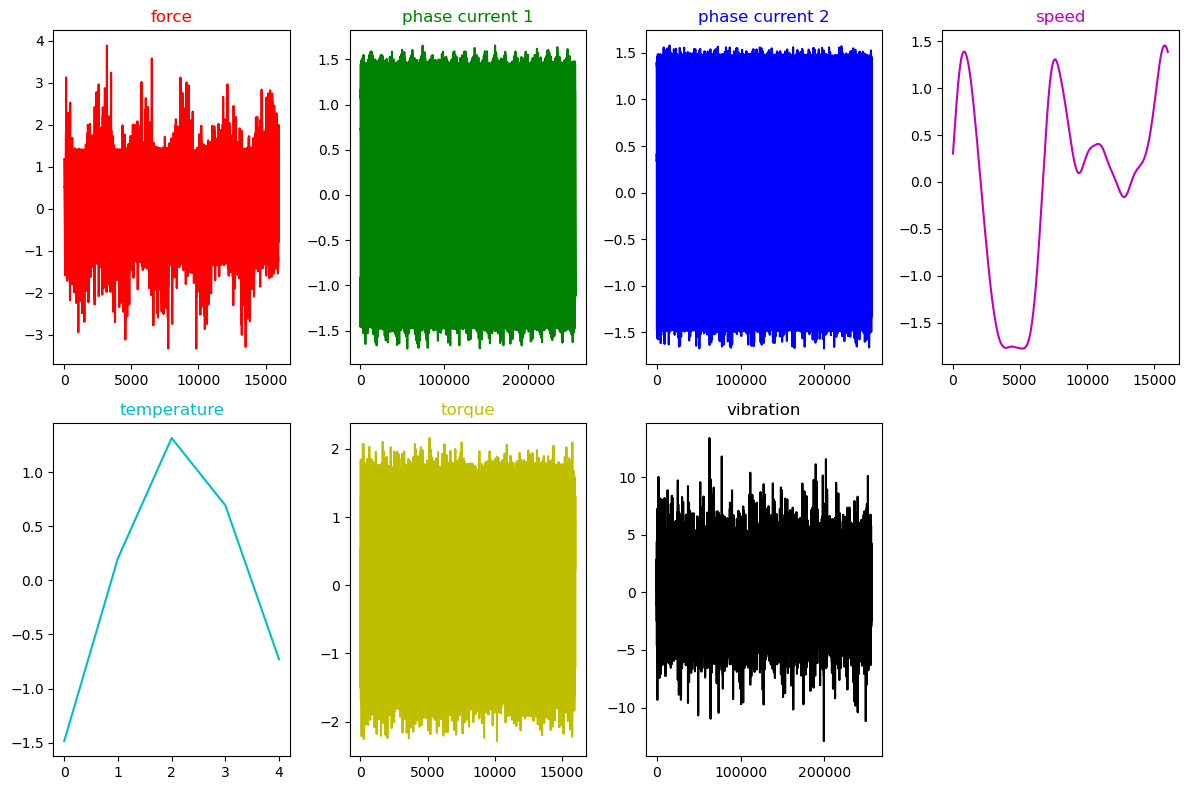

In [75]:
import matplotlib.pyplot as plt

# Assuming df_ is your DataFrame
# List of columns you are interested in
selected_columns = ['force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque', 'vibration_1']

selected_columns_name = ['force', 'phase current 1', 'phase current 2', 'speed', 'temperature', 'torque', 'vibration']

# Define colors for each plot
colors = ['r', 'g', 'b', 'm', 'c', 'y', 'k']

# Plot time series
plt.figure(figsize=(12, 8))

for i, (col,col_n, color) in enumerate(zip(selected_columns, selected_columns_name, colors)):
    plt.subplot(2, 4, i+1)
    plt.plot(df_[col].iloc[0], color=color)
    plt.title(f"{col_n}", color=color)

plt.tight_layout()
plt.show()


In [111]:
def FE(df):

    Hzerocross = []
    Vzerocross = []
    Hkurtosis = []
    Vkurtosis = []
    Hrms = []
    Vrms = []
    Hpeaks = []
    Vpeaks = []
    Hmean = []
    Vmean = []
    Hstd = []
    Vstd = []
    Hmedian = []
    Vmedian = []
    Hskewness = []
    Vskewness = []
    Henergy = []
    Venergy = []
    Hshapiro = []
    Vshapiro = []
    Hkl = []
    Vkl = []
    Hrkl = []
    Vrkl = []
    Hcrest = []
    Vcrest = []

    for i in range(0, len(df), size_const):
        Horizontal = signal.decimate(df["Horizontal_vibration_signals"][i : i + size_const], 2)
        Vertical = signal.decimate(df["Vertical_vibration_signals"][i : i + size_const], 2)

        # zero crossing
        Hc = ((Horizontal[:-1] * Horizontal[1:]) < 0).sum() + (Horizontal == 0).sum()
        Hzerocross.append(Hc)
        Vc = ((Vertical[:-1] * Vertical[1:]) < 0).sum() + (Vertical == 0).sum()
        Vzerocross.append(Vc)

        # kurtosis: distribution tail
        Hkur = kurtosis(Horizontal)
        Hkurtosis.append(Hkur)
        Vkur = kurtosis(Vertical)
        Vkurtosis.append(Vkur)

        # RMS  root-mean-square value of a signal: Loosely speaking, it represents the average "power" of a signal.
        # The root mean square (RMS) is widely used to represent HIs and is further employed to identify the initial
        # point of degradation when the RMS exceeds a pre-specified threshold
        # Wang, W. A model to predict the residual life of rolling element bearings given monitored condition information
        # to date. IMA J. Manag. Math. 2002, 13, 3–16.
        hrms = np.sqrt(np.mean(Horizontal**2))
        Hrms.append(hrms)
        vrms = np.sqrt(np.mean(Vertical**2))
        Vrms.append(vrms)

        # Number of peaks
        hpeaks, _ = find_peaks(Horizontal)
        Hpeaks.append(len(hpeaks) / len(Horizontal))
        vpeaks, _ = find_peaks(Vertical)
        Vpeaks.append(len(vpeaks) / len(Vertical))

        # Mean
        Hmean.append(np.mean(Horizontal))
        Vmean.append(np.mean(Vertical))

        # Median
        Hmedian.append(np.median(abs(Horizontal)))
        Vmedian.append(np.median(abs(Vertical)))

        # std
        Hstd.append(np.std(Horizontal))
        Vstd.append(np.std(Vertical))

        # Skewness
        Hskewness.append(stats.skew(Horizontal))
        Vskewness.append(stats.skew(Vertical))

        # Crest
        Hcrest.append(
            np.max(np.abs(Horizontal)) / np.sqrt(np.mean(np.square(Horizontal)))
        )
        Vcrest.append(np.max(np.abs(Vertical)) / np.sqrt(np.mean(np.square(Vertical))))

        # Energy
        Henergy.append(np.sum(np.abs(Horizontal) ** 2))
        Venergy.append(np.sum(np.abs(Vertical) ** 2))

        # Shapiro
        Hs, Hp = stats.shapiro(Horizontal)
        Hshapiro.append(Hs)
        Vs, Vp = stats.shapiro(Vertical)
        Vshapiro.append(Vs)

        # KL
        x = np.linspace(min(Horizontal), max(Horizontal), 100)
        Hen = stats.entropy(
            stats.gaussian_kde(Horizontal).evaluate(x),
            stats.norm.pdf(x, np.mean(Horizontal), np.std(Horizontal)),
        )
        Hkl.append(Hen)
        x = np.linspace(min(Vertical), max(Vertical), 100)
        Ven = stats.entropy(
            stats.gaussian_kde(Vertical).evaluate(x),
            stats.norm.pdf(x, np.mean(Vertical), np.std(Vertical)),
        )
        Vkl.append(Ven)

        # Reverse KL
        x = np.linspace(min(Horizontal), max(Horizontal), 100)
        Hren = stats.entropy(
            stats.norm.pdf(x, np.mean(Horizontal), np.std(Horizontal)),
            stats.gaussian_kde(Horizontal).evaluate(x),
        )
        Hrkl.append(Hren)
        x = np.linspace(min(Vertical), max(Vertical), 100)
        Vren = stats.entropy(
            stats.norm.pdf(x, np.mean(Vertical), np.std(Vertical)),
            stats.gaussian_kde(Vertical).evaluate(x),
        )
        Vrkl.append(Vren)

    df = pd.DataFrame(Hzerocross, columns=["Hzerocross"])
    df["Hkurtosis"] = Hkurtosis
    df["Hrms"] = Hrms
    df["Hpeaks"] = Hpeaks
    df["Hmean"] = Hmean
    df["Hstd"] = Hstd
    df["Hmedian"] = Hmedian
    df["Hskewness"] = Hskewness
    df["Hcrest"] = Hcrest
    df["Henergy"] = Henergy
    df["Hshapiro"] = Hshapiro
    df["Hkl"] = Hkl
    df["Hrkl"] = Hrkl
    df["Vzerocross"] = Vzerocross
    df["Vkurtosis"] = Vkurtosis
    df["Vrms"] = Vrms
    df["Vpeaks"] = Vpeaks
    df["Vmean"] = Vmean
    df["Vstd"] = Vstd
    df["Vmedian"] = Vmedian
    df["Vskewness"] = Vskewness
    df["Vcrest"] = Vcrest
    df["Venergy"] = Venergy
    df["Vshapiro"] = Vshapiro
    df["Vkl"] = Vkl
    df["Vrkl"] = Vrkl

    mask = df["Hkl"] != np.inf
    df.loc[~mask, "Hkl"] = df.loc[mask, "Hkl"].max()

    mask = df["Vkl"] != np.inf
    df.loc[~mask, "Vkl"] = df.loc[mask, "Vkl"].max()

    mask = df["Hrkl"] != np.inf
    df.loc[~mask, "Hrkl"] = df.loc[mask, "Hrkl"].max()

    mask = df["Vrkl"] != np.inf
    df.loc[~mask, "Vrkl"] = df.loc[mask, "Vrkl"].max()

    return df

(16001,)

In [97]:
working_dir = Path('.')
DATA_PATH = Path("./BearingDataCenter")
save_model_path = working_dir / 'Model'
DE_path = DATA_PATH / 'K001'
dic_ = matfile_to_dic(DE_path)
print(dic_)


{'N15_M07_F10_K001_17': {'force': array([1091.14218675, 1093.27841722, 1096.94052659, ..., 1089.00595629,
       1164.38437421, 1085.03867113]), 'phase_current_1': array([ 0.87475281,  0.90092651,  0.92916656, ..., -1.24876129,
       -1.35070099, -1.34036926]), 'phase_current_2': array([ 1.58282043,  1.58764191,  1.69164795, ..., -1.14819916,
       -1.25427154, -1.18952606]), 'speed': array([1499.75715006, 1499.75706528, 1499.75698045, ..., 1500.19673965,
       1500.19694236, 1500.19714474]), 'temp_2_bearing_module': array([46.70410153, 46.49353024, 46.60949704, 46.67968747, 46.53015134]), 'torque': array([1.1812308 , 1.21540639, 1.28734078, ..., 1.26872871, 1.23843815,
       1.24914829]), 'vibration_1': array([ 0.24108887,  0.25024414,  0.16479492, ..., -0.12207031,
       -0.14953613, -0.56152344])}, 'N15_M01_F10_K001_4': {'force': array([1086.25937426, 1080.15585864, 1042.00888601, ..., 1086.86972582,
       1102.73886643, 1094.49912035]), 'phase_current_1': array([-1.23154175, 

In [129]:
feature_df.to_csv('./paderborn_feature_df.csv', index=False)


In [1]:
import pandas as pd
feature_df = pd.read_csv("./paderborn_feature_df.csv")
feature_df

,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1,file_name,label,subdir
0,"[0, 1.5596687262135855, 1075.9129764620357, 0....","[4226, -1.4871247091495947, 0.8895281276442817...","[4610, -1.4847260197846792, 0.8969772279007703...","[0, -1.5420854399927426, 1499.6150419832427, 0...","[0, -0.8013533460630748, 39.54408367316329, 0....","[0, -0.379668048150847, 0.609799864540752, 0.1...","[47002, 2.5255158149451367, 0.3953664183605892...",N15_M01_F10_KI16_6,1,KI16
1,"[0, 1.5450734779156239, 1071.820346036199, 0.2...","[4160, -1.4851287393943546, 0.8922817985717926...","[4854, -1.4901150748969467, 0.8983596750501398...","[0, -0.43790456348076834, 1499.5475433989998, ...","[0, -0.4836944102039422, 38.74575844397446, 0....","[0, -0.4762703214236801, 0.6111204793678936, 0...","[46230, 2.242185210196122, 0.39807372066509317...",N15_M01_F10_KI16_18,1,KI16
2,"[0, 1.4792008110443238, 1073.2862127969818, 0....","[4034, -1.4858657059400582, 0.8893638661217388...","[4760, -1.485056610853906, 0.8965236088477619,...","[0, -1.3335583262439537, 1499.668827046112, 0....","[0, -0.9802097548113391, 39.22917379264401, 0....","[0, -0.05746189646974864, 0.6092176624659649, ...","[45897, 2.174337282604485, 0.40048358735647827...",N15_M01_F10_KI16_14,1,KI16
3,"[0, 0.456550943488637, 1058.4679262690179, 0.2...","[2441, -1.4938588545052627, 1.6963649690315032...","[2597, -1.4942360711553055, 1.7066038549331806...","[0, -0.5962370455501809, 899.898773981915, 0.0...","[0, -1.453632905298978, 40.45421862401034, 0.2...","[0, -0.4650042756926198, 1.2245234133217673, 0...","[51986, 6.294954876545033, 0.17137046821373506...",N09_M07_F10_KI16_16,1,KI16
4,"[0, 2.096659768132233, 441.20032734888883, 0.2...","[2469, -1.50277482540415, 1.7405928708498482, ...","[2566, -1.4913051998741622, 1.7542023087740912...","[0, -0.4336472964687119, 1499.2573938361159, 6...","[0, -1.5667258675016997, 41.672389330149194, 0...","[0, -0.7640591622018711, 1.2442092594859824, 0...","[53932, 3.849829286293107, 0.35518135359116587...",N15_M07_F04_KI16_2,1,KI16
...,...,...,...,...,...,...,...,...,...,...
2235,"[0, -1.1404144776938074, 1038.4085135923633, 0...","[2632, -1.494687680026539, 1.682341890935776, ...","[2747, -1.4940956181146816, 1.6890092757504902...","[0, -1.2706681166458194, 899.7477841491799, 0....","[0, -1.0106701343722206, 45.24051428896427, 0....","[0, 0.32387272058043015, 1.219974168200798, 0....","[95465, 18.73721763431713, 0.3229855025465105,...",N09_M07_F10_K003_10,0,K003
2236,"[0, -1.092241136857368, 1041.0857188274622, 0....","[2651, -1.494628432708493, 1.687690865582106, ...","[2716, -1.4942288098350556, 1.6940575993796638...","[0, -1.0872475949443103, 899.753154340178, 0.0...","[0, -0.2715966314912528, 44.59356374735334, 0....","[0, 0.09659678920407488, 1.2240610235274496, 0...","[95560, 18.401937921207683, 0.3244448047247391...",N09_M07_F10_K003_18,0,K003
2237,"[0, -1.1231866146559502, 1037.878644762435, 0....","[2590, -1.4940706484921646, 1.6797932553624662...","[2721, -1.4942019702793714, 1.6866466112866476...","[0, -1.056714371585377, 899.7543740675991, 0.0...","[0, -0.8348801175542322, 45.32660177617095, 0....","[0, -0.014912575732971334, 1.2183051222539905,...","[95353, 18.496369024356845, 0.3246570729035775...",N09_M07_F10_K003_9,0,K003
2238,"[0, -1.038116005701264, 1037.9467093541275, 0....","[2673, -1.494101108543925, 1.6762767524272646,...","[2757, -1.4941010347856396, 1.6826859810562251...","[0, -0.7460820611337464, 899.775947089643, 0.0...","[0, -1.1309505731296718, 45.6121861561602, 0.2...","[0, -0.312648169850112, 1.2156535861450701, 0....","[96826, 18.498460725606215, 0.3366793586025853...",N09_M07_F10_K003_7,0,K003


In [8]:
orig_feature = pd.read_csv("paderborn_feature_df.csv")
orig_feature

,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1,file_name,label,subdir
0,"[0, 1.5596687262135855, 1075.9129764620357, 0....","[4226, -1.4871247091495947, 0.8895281276442817...","[4610, -1.4847260197846792, 0.8969772279007703...","[0, -1.5420854399927426, 1499.6150419832427, 0...","[0, -0.8013533460630748, 39.54408367316329, 0....","[0, -0.379668048150847, 0.609799864540752, 0.1...","[47002, 2.5255158149451367, 0.3953664183605892...",N15_M01_F10_KI16_6,1,KI16
1,"[0, 1.5450734779156239, 1071.820346036199, 0.2...","[4160, -1.4851287393943546, 0.8922817985717926...","[4854, -1.4901150748969467, 0.8983596750501398...","[0, -0.43790456348076834, 1499.5475433989998, ...","[0, -0.4836944102039422, 38.74575844397446, 0....","[0, -0.4762703214236801, 0.6111204793678936, 0...","[46230, 2.242185210196122, 0.39807372066509317...",N15_M01_F10_KI16_18,1,KI16
2,"[0, 1.4792008110443238, 1073.2862127969818, 0....","[4034, -1.4858657059400582, 0.8893638661217388...","[4760, -1.485056610853906, 0.8965236088477619,...","[0, -1.3335583262439537, 1499.668827046112, 0....","[0, -0.9802097548113391, 39.22917379264401, 0....","[0, -0.05746189646974864, 0.6092176624659649, ...","[45897, 2.174337282604485, 0.40048358735647827...",N15_M01_F10_KI16_14,1,KI16
3,"[0, 0.456550943488637, 1058.4679262690179, 0.2...","[2441, -1.4938588545052627, 1.6963649690315032...","[2597, -1.4942360711553055, 1.7066038549331806...","[0, -0.5962370455501809, 899.898773981915, 0.0...","[0, -1.453632905298978, 40.45421862401034, 0.2...","[0, -0.4650042756926198, 1.2245234133217673, 0...","[51986, 6.294954876545033, 0.17137046821373506...",N09_M07_F10_KI16_16,1,KI16
4,"[0, 2.096659768132233, 441.20032734888883, 0.2...","[2469, -1.50277482540415, 1.7405928708498482, ...","[2566, -1.4913051998741622, 1.7542023087740912...","[0, -0.4336472964687119, 1499.2573938361159, 6...","[0, -1.5667258675016997, 41.672389330149194, 0...","[0, -0.7640591622018711, 1.2442092594859824, 0...","[53932, 3.849829286293107, 0.35518135359116587...",N15_M07_F04_KI16_2,1,KI16
...,...,...,...,...,...,...,...,...,...,...
2235,"[0, -1.1404144776938074, 1038.4085135923633, 0...","[2632, -1.494687680026539, 1.682341890935776, ...","[2747, -1.4940956181146816, 1.6890092757504902...","[0, -1.2706681166458194, 899.7477841491799, 0....","[0, -1.0106701343722206, 45.24051428896427, 0....","[0, 0.32387272058043015, 1.219974168200798, 0....","[95465, 18.73721763431713, 0.3229855025465105,...",N09_M07_F10_K003_10,0,K003
2236,"[0, -1.092241136857368, 1041.0857188274622, 0....","[2651, -1.494628432708493, 1.687690865582106, ...","[2716, -1.4942288098350556, 1.6940575993796638...","[0, -1.0872475949443103, 899.753154340178, 0.0...","[0, -0.2715966314912528, 44.59356374735334, 0....","[0, 0.09659678920407488, 1.2240610235274496, 0...","[95560, 18.401937921207683, 0.3244448047247391...",N09_M07_F10_K003_18,0,K003
2237,"[0, -1.1231866146559502, 1037.878644762435, 0....","[2590, -1.4940706484921646, 1.6797932553624662...","[2721, -1.4942019702793714, 1.6866466112866476...","[0, -1.056714371585377, 899.7543740675991, 0.0...","[0, -0.8348801175542322, 45.32660177617095, 0....","[0, -0.014912575732971334, 1.2183051222539905,...","[95353, 18.496369024356845, 0.3246570729035775...",N09_M07_F10_K003_9,0,K003
2238,"[0, -1.038116005701264, 1037.9467093541275, 0....","[2673, -1.494101108543925, 1.6762767524272646,...","[2757, -1.4941010347856396, 1.6826859810562251...","[0, -0.7460820611337464, 899.775947089643, 0.0...","[0, -1.1309505731296718, 45.6121861561602, 0.2...","[0, -0.312648169850112, 1.2156535861450701, 0....","[96826, 18.498460725606215, 0.3366793586025853...",N09_M07_F10_K003_7,0,K003


# Preprocess Paderborn dataset

In [2]:
#%%
import os,re
import glob
import errno
import random
import urllib.request 
import numpy as np
from scipy.io import loadmat
from sklearn.utils import shuffle
import sys
import time
from tqdm import tqdm

import os
start_time = time.time()
class Paderborn:
    def __init__(self, experiment, seq_len, *bearing_element):

        if experiment not in ('Artificial', 'Healthy', 'Real'):
            print("wrong experiment name: {}".format(experiment))
            sys.exit(1) 
        # print(bearing_element)
        for i in bearing_element:
            if i not in ('OR', 'IR','Normal'): 
                print("wrong bearing element value: {}".format(bearing_element))
                sys.exit(1)
        # Root directory of all data and loading in text file
        rdir = os.path.join(os.path.expanduser('~'), 'Datasets')
        cur_path = os.getcwd()
        fmeta = os.path.join(cur_path, "datafiles.txt")


        # Read text file and load all separate http addresses
        all_lines = open(fmeta).readlines() 
        lines = []
        for line in all_lines:
            l = line.split()
            if l[0] in experiment and l[1] in bearing_element:
                lines.append(l)

        self.seq_len = seq_len
#         self.unpack_files(rdir, lines)
        self.read_matfiles(rdir, experiment,bearing_element)
        self.threshold_selector()
        self.data_divider()

    def slicer(self,time_series,seq_len):
        # Divide the data into sequences based on the sequence length and the length of the time series
        idx_last = -(time_series.shape[0] % seq_len)
        if idx_last < 0:
            clips = time_series[:idx_last].reshape(-1, seq_len)
        else:
            clips = time_series[idx_last:].reshape(-1, seq_len)
        return(clips)

    def most_frequent(self,list_values):
        return max(set(list_values), key = list_values.count)    

    def _mkdir(self, path):
        try:
            os.makedirs(path)
        except OSError as exc:
            if exc.errno == errno.EEXIST and os.path.isdir(path):
                pass
            else:
                print("can't create directory '{}''".format(path))
                exit(1)
    def _download(self, fpath, link):
        print("Downloading to: '{}'".format(fpath))
        urllib.request.urlretrieve(link, fpath)

    def unpack_files(self, rdir, lines):
        for idx, info in enumerate(lines):
            # Directory of this file
            fdir = os.path.join(rdir, info[0], info[1])
            self._mkdir(fdir)
            fpath = os.path.join(fdir, info[2] + '.rar')
            if not os.path.exists(fpath):
                self._download(fpath, info[3])

            from sys import platform
            if platform == "win32":
                import patoolib
                patoolib.extract_archive(fpath, outdir=fdir)
            else:
                import subprocess
                ab = os.chdir(fdir)
                list_files = subprocess.run(["unar",fpath])
            ## Run a subprocess using homebrew combined with unar to unpack rar files downloaded from the Paderborn Bearing website. 
            


    def read_matfiles(self,directory,experiment,bearing_element):
        y_divider = 0
        self.y_list = []
        directory = os.path.join(directory,experiment)
        self.empty_list = []
        file_name = []
        # Read .mat files based on the bearing element damage and the experiment name
        for paths, dirs, files in os.walk(directory):
            print(paths, dirs, files)
            if paths.endswith(bearing_element):
                for paths, dirs, files in os.walk(paths):
                    for j in dirs:
                        y_divider += 1
                        print(y_divider)
                        self.y_list.append(1)
                    for i in files:
                        if '.mat' in i:
                            mat_dict = loadmat(os.path.join(paths,i))
                            file = mat_dict[list(mat_dict.keys())[-1]]
                            file_name.append(i)
                            
                            for index,i in enumerate(file[0][0]):
                                if index == 1:
                                    self.empty_list.append(i)
                                if index == 2:
                                    self.empty_list.append(i)
        # Calculate the amount of conditions for identifying the target values                                    
        self.y_files = int(len(file_name) / y_divider)


    def threshold_selector(self):
        threshold_list = []
        labels = []

        # Iterate over every file to receive the sensor values sampled at 64 KHz for approximately 4 seconds per file. Therefore every array should be longer than 200k datapoints
        for index,i in enumerate(self.empty_list,self.seq_len):
            for j in i:
                for i2 in j:
                    for i3 in i2:
                        for i4 in i3:
                            if len(i4) > 200000: # Arbitrary length based on the 64kHZ for 4 seconds
                                khz_64 = self.slicer(i4,self.seq_len)
                                threshold_list.append(len(khz_64))

        # Calculate threshold used to indentify the length of every array
        self.threshold = self.most_frequent(threshold_list)

        # Create a target value for every of the sequences in the data
        for index, ix in enumerate(self.y_list):
            labels.extend([index] * self.y_files * self.threshold)
        self.labels = np.array(labels)


    def data_divider(self):
        # Divide the data into sequences of a given length for the two motor current sensor data points and the seperately provided vibrations sensor readings. 
        time_khz64 = np.zeros((self.threshold,self.seq_len))
        self.motor_current = np.zeros((0,self.seq_len,2)) 
        self.vibration_sens = np.zeros((0,self.seq_len,1))
        y_64 = []
        indexer1 = 0
        for index,i in tqdm(enumerate(self.empty_list,self.seq_len)):
            for j in i:
                for i2 in j:
                    for i3 in i2:
                        for i4 in i3:
                            if len(i4) > 200000: # Arbitrary length based on the 64kHZ for 4 seconds
                                khz_64 = self.slicer(i4,self.seq_len)
                                if khz_64.shape[0] > self.threshold:
                                    khz_64 = khz_64[:self.threshold,]
                                if khz_64.shape[0] < self.threshold:
                                    repeater = self.threshold - khz_64.shape[0]
                                    c = np.repeat(khz_64[-1][None,:], repeater, axis=0)
                                    khz_64 = np.concatenate((khz_64,c))
                                time_khz64 = np.dstack((time_khz64, khz_64))
                                if time_khz64.shape[2] == 5:
                                    vibrations = time_khz64[:,:,4:5]
                                    motor_current = time_khz64[:,:,2:4]
                                    self.motor_current = np.vstack((self.motor_current,motor_current))
                                    self.vibration_sens = np.vstack((self.vibration_sens,vibrations))
                                    time_khz64 = np.zeros((self.threshold,self.seq_len))
print("--- %s seconds ---" % (time.time() - start_time))
Paderborn("Artificial", 1024, "OR")


In [64]:
from pathlib import Path
from helper import get_df_all, download, matfile_to_df, normalize_signal, divide_signal
import pandas as pd

working_dir = Path('.')
DATA_PATH = Path("./BearingDataCenter")
save_model_path = working_dir / 'Model'

# Define the paths and categories
paths = {
    'Healthy': {'Training': ['K002'], 'Testing': ['K001']},
    'OR Damage': {'Training': ['KA01', 'KA05', 'KA07'], 'Testing': ['KA22', 'KA04', 'KA30', 'KA15', 'KA16']},
    'IR Damage': {'Training': ['KI01', 'KI05', 'KI07'], 'Testing': ['KI114', 'KI21', 'KI17', 'KI18', 'KI16']}
}

data_cats = ['vibration_1', 'force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque']

# Initialize empty DataFrames to store all data
df_train_data = pd.DataFrame()
df_test_data = pd.DataFrame()

# Loop through each class and path to load data
# ... (previous code)

# Loop through each class and path to load data
for label, split_paths in paths.items():
    for split, path_list in split_paths.items():
        for path in path_list:
            for data_cat in data_cats:
                full_path = DATA_PATH / path
                try:
                    df_all = get_df_all(full_path, data_cat=data_cat, normalize=True)
                except Exception as e:
                    print(f"Error occurred while processing {full_path} with data_cat {data_cat}: {e}")
                    continue
                
                # Debug: Print out columns
                print(f"Columns in df_all: {df_all.columns}")
                
                df_all['class'] = label  # Add class label
                df_all['data_cat'] = data_cat  # Add data category

                if 'label' not in df_all.columns or 'filename' not in df_all.columns:
                    print(f"Columns 'label' or 'filename' missing in DataFrame for {full_path} and data_cat {data_cat}. Available columns: {df_all.columns}")
                    continue

                if split == 'Training':
                    df_train_data = pd.concat([df_train_data, df_all], ignore_index=True)
                elif split == 'Testing':
                    df_test_data = pd.concat([df_test_data, df_all], ignore_index=True)




Columns in df_all: Index([   'label', 'filename',          0,          1,          2,          3,
                4,          5,          6,          7,
       ...
              502,        503,        504,        505,        506,        507,
              508,        509,        510,        511],
      dtype='object', length=514)
Columns in df_all: Index([   'label', 'filename',          0,          1,          2,          3,
                4,          5,          6,          7,
       ...
              502,        503,        504,        505,        506,        507,
              508,        509,        510,        511],
      dtype='object', length=514)
Columns in df_all: Index([   'label', 'filename',          0,          1,          2,          3,
                4,          5,          6,          7,
       ...
              502,        503,        504,        505,        506,        507,
              508,        509,        510,        511],
      dtype='object', length=514)
C

In [3]:
DE_path = DATA_PATH / 'KA01'
df_tmp = get_df_all(DE_path, data_cat='vibration_1', normalize=True)
df_tmp1 = get_df_all(DE_path, data_cat='force', normalize=True)

df_tmp2 = get_df_all(DE_path, data_cat='phase_current_1', normalize=True)

df_tmp3 = get_df_all(DE_path, data_cat='phase_current_2', normalize=True)
df_tmp4 = get_df_all(DE_path, data_cat='speed', normalize=True)
df_tmp5 = get_df_all(DE_path, data_cat='temp_2_bearing_module', normalize=True)
df_tmp6 = get_df_all(DE_path, data_cat='torque', normalize=True)




# data_cats = ['vibration_1', 'force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque']


In [38]:
df_tmp

(       label             filename         0         1         2         3  \
 0          2  N15_M07_F04_KA01_14 -0.117806 -0.012225 -0.258581  0.122684   
 1          2  N15_M07_F04_KA01_14  0.415964  0.445292  0.380770  0.198937   
 2          2  N15_M07_F04_KA01_14 -1.056303  0.427695  0.674051  0.539142   
 3          2  N15_M07_F04_KA01_14 -0.065016 -0.164731 -0.018091 -0.035688   
 4          2  N15_M07_F04_KA01_14 -0.018091 -0.012225 -0.094344 -0.029822   
 ...      ...                  ...       ...       ...       ...       ...   
 40068      2   N09_M07_F10_KA01_4  0.452674  0.561591  0.316528  0.098693   
 40069      2   N09_M07_F10_KA01_4 -2.991833 -3.454731 -3.291355 -2.665081   
 40070      2   N09_M07_F10_KA01_4  0.193996  0.221225  0.221225  0.044235   
 40071      2   N09_M07_F10_KA01_4 -0.051068 -0.091912 -0.840718  0.003391   
 40072      2   N09_M07_F10_KA01_4  0.193996 -0.541195 -1.657597 -0.854332   
 
               4         5         6         7  ...       502 

In [68]:
from helper import matfile_to_dic, label
dic_ = matfile_to_dic(DE_path)
df_ = pd.DataFrame.from_dict(dic_).T
df_ = df_.reset_index().rename(mapper={'index':'filename'},axis=1)
df_['label'] = df_['filename'].apply(label)
df_

,filename,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1,label
0,N15_M07_F04_KA01_14,"[463.7007809192448, 477.1285152853709, 470.109...","[-1.8266491687147064, -1.9031039416133988, -1....","[2.3928277572077263, 2.436221006690768, 2.2660...","[1500.4830028462254, 1500.48380324745, 1500.48...","[46.57287594578411, 46.640014617614746, 46.563...","[1.3013570677317958, 1.3254995511308234, 1.343...","[-0.07629394526208, -0.0213623046733824, -0.14...",OR
1,N15_M01_F10_KA01_12,"[1133.8667961013557, 1136.3082023497423, 1130....","[0.4745706173621541, 0.5117648312047614, 0.599...","[0.6660519404777984, 0.7307974238334477, 0.780...","[1500.129402474016, 1500.1294287086441, 1500.1...","[44.82727047818773, 44.83337399380869, 44.5922...","[0.6234548375444393, 0.5964609881128671, 0.628...","[0.289916991995904, 0.3875732419313664, 0.3906...",OR
2,N15_M07_F10_KA01_3,"[1100.2974601860403, 1105.1802726828134, 1106....","[0.2293643186960774, 0.3319927976321601, 0.197...","[-2.3418579086085978, -2.4341546614772898, -2....","[1499.8219836618373, 1499.8215320644854, 1499....","[48.24523922592891, 48.19030758534021, 48.2055...","[1.4286729598827435, 1.4284169677191825, 1.408...","[-0.10375976555642881, -0.051879882778214405, ...",OR
3,N15_M07_F10_KA01_12,"[1052.0796867804058, 1063.0660148981453, 1076....","[-1.905859068564703, -1.9492523180477448, -2.0...","[2.319816892998164, 2.1910147080246913, 2.2709...","[1498.9237326890243, 1498.9242615455269, 1498....","[48.18420406971924, 48.27270504622326, 48.3001...","[1.267459311149895, 1.2645804658898696, 1.2735...","[-1.751708983217357, -1.9165039049834496, -1.7...",OR
4,N15_M01_F10_KA01_17,"[1017.8999993029939, 1025.8345696102504, 1034....","[0.6171484370921482, 0.6460772700808427, 0.665...","[-1.3651654043712473, -1.419579161659506, -1.3...","[1500.033833712475, 1500.032983005807, 1500.03...","[45.38574215750615, 45.38879391531663, 45.3735...","[0.6910287881242778, 0.6768700506927151, 0.665...","[1.1688232414150657, 1.312255858507776, 0.9399...",OR
...,...,...,...,...,...,...,...,...,...
75,N15_M07_F10_KA01_5,"[1029.4966789828302, 1016.6792961788007, 1008....","[-0.8410025018856171, -0.8416912836234433, -0....","[-1.7281533802055802, -1.8183837878607938, -1....","[1501.1010895590443, 1501.1013160126863, 1501....","[48.22692867906601, 48.18725582752973, 48.1292...","[1.3075281673566475, 1.3426694442758171, 1.356...","[0.7720947260522496, 0.3936767575523328, 0.189...",OR
76,N09_M07_F10_KA01_16,"[1047.502050064681, 1043.2295891300046, 1027.9...","[-1.902415159875573, -1.9340991198155717, -1.9...","[-0.49592285123476193, -0.5455151363582381, -0...","[899.3037407168881, 899.3027587515494, 899.301...","[43.1243896199381, 43.21289059644211, 43.08166...","[1.32270623533087, 1.3032380545847557, 1.28064...","[0.15258789052416, 0.10681152336691199, 0.1373...",OR
77,N15_M07_F10_KA01_7,"[1033.4639641364583, 1042.619237567908, 1042.9...","[2.5367831404133723, 2.4307107527881597, 2.479...","[-1.7653475940481873, -1.8755526721003568, -1....","[1500.8248089418664, 1500.8250287812689, 1500....","[48.24218746811842, 48.13232418694103, 48.1567...","[1.2424739081260978, 1.215880457184088, 1.2111...","[-0.4791259762458624, -0.6713867183063039, -0....",OR
78,N15_M01_F10_KA01_4,"[1045.9761711594394, 1044.4502922541978, 1034....","[1.323838500101684, 1.217766112476471, 1.29353...","[-0.899548949600832, -0.9884017937803936, -0.9...","[1500.3479959592373, 1500.348417932678, 1500.3...","[43.481445283764636, 43.652343721151695, 43.77...","[0.6402300745483833, 0.617123132560958, 0.6025...","[-0.35095214820556797, -0.20446777330237442, -...",OR


In [87]:
len(list(df_['vibration_1'])[0])

256095

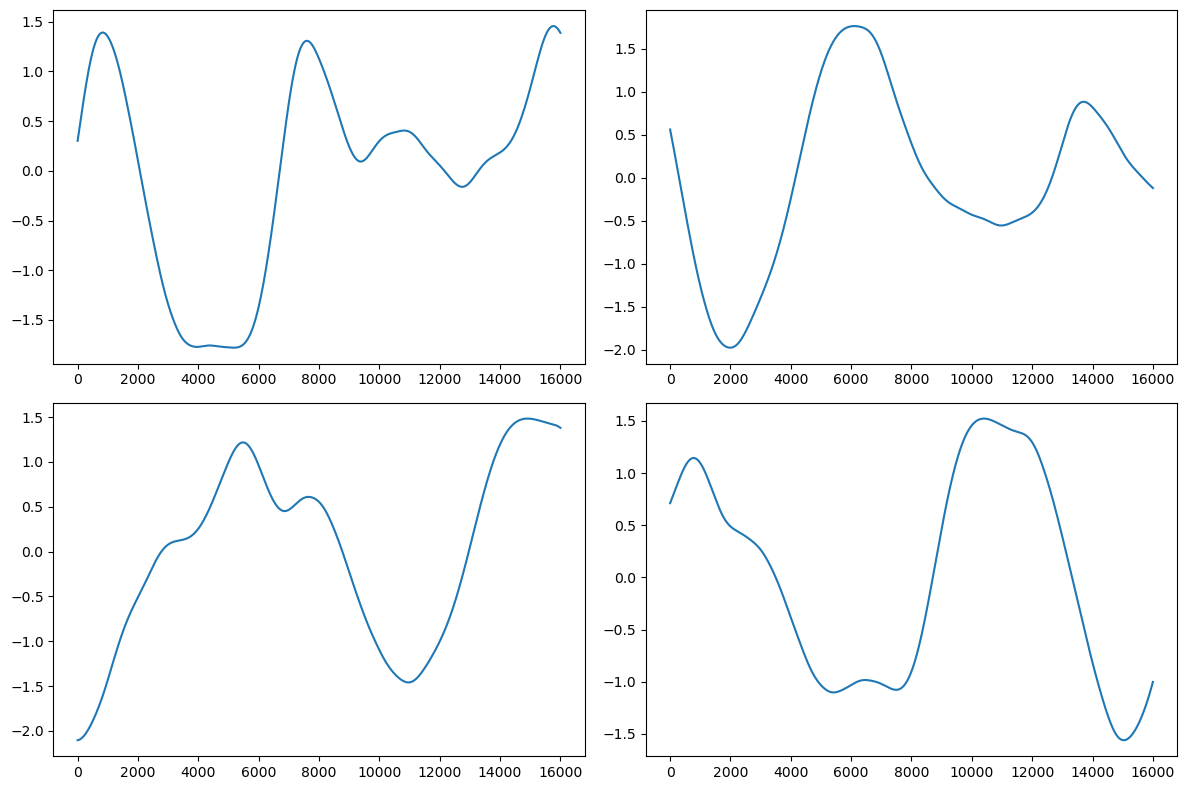

In [51]:
import matplotlib.pyplot as plt

# Assuming df_ is your DataFrame and 'vibration_1' is the column of interest

# Plot adjacent time series
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_['speed'].iloc[0])
# plt.title('Adjacent 1')

plt.subplot(2, 2, 2)
plt.plot(df_['speed'].iloc[1])
# plt.title('Adjacent 2')

plt.subplot(2, 2, 3)
plt.plot(df_['speed'].iloc[3])
# plt.title('Adjacent 3')

# Plot distant time series
plt.subplot(2, 2, 4)
plt.plot(df_['speed'].iloc[-1])  # Last row as an example
# plt.title('Distant')

plt.tight_layout()
plt.show()


In [41]:
def normalize_signal(df, data_cat):
    '''
    Normalize the signals in the DataFrame by subtracting
    the mean and dividing by the standard deviation.
    '''
    if type(data_cat) is not list:
        data_cat = [data_cat]
    
    for category in data_cat:
        if category == 'label':
            continue
        df[category] = df[category].apply(lambda x: [(i - np.mean(x)) / np.std(x) for i in x])
    
    return df
data_cats = ['force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque', 'vibration_1']
normalized_df = normalize_signal(df_, data_cats)
print(normalized_df)

               filename                                              force  \
0    N15_M07_F10_K003_4  [1.1843357539860995, 1.1135134760770413, 1.088...   
1   N15_M01_F10_K003_20  [-0.5795363910793204, -1.1619598446500938, -1....   
2    N15_M07_F10_K003_3  [-0.7535385377355858, -0.890269826152048, -0.9...   
3   N15_M07_F10_K003_15  [1.2194290100230758, 0.8776532793234284, 0.301...   
4    N09_M07_F10_K003_2  [0.011131010438699235, -0.22047126695052258, -...   
..                  ...                                                ...   
75  N09_M07_F10_K003_10  [-0.4710755630550271, -0.11637026604427626, -0...   
76  N09_M07_F10_K003_18  [0.3914350607402507, 0.42207591114880355, 0.33...   
77   N09_M07_F10_K003_9  [-0.8908514087178485, -1.26692916831005, -1.23...   
78   N09_M07_F10_K003_7  [1.232787417579801, 1.1145870553979498, 1.2379...   
79  N15_M01_F10_K003_11  [-1.4291154804895703, -1.8313079298612134, -0....   

                                      phase_current_1  \
0   [-

In [42]:
normalized_df.to_csv("normalized_paderborn.csv")

In [168]:
from scipy.stats import kurtosis, skew, shapiro, entropy
from scipy.signal import find_peaks
from scipy.stats import norm
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd

def FE(lst):
    feature_array = []
    
    # Zero crossing
    zero_cross = ((lst[:-1] * lst[1:]) < 0).sum() + (lst == 0).sum()
    feature_array.append(zero_cross)
    
    # Kurtosis
    kurt = kurtosis(lst)
    feature_array.append(kurt)
    
    # RMS
    rms = np.sqrt(np.mean(np.array(lst)**2))
    feature_array.append(rms)
    
    # Number of peaks
    peaks, _ = find_peaks(lst)
    feature_array.append(len(peaks) / len(lst))
    
    # Mean
    feature_array.append(np.mean(lst))
    
    # Median
    feature_array.append(np.median(np.abs(lst)))
    
    # Std
    feature_array.append(np.std(lst))
    
    # Skewness
    feature_array.append(skew(lst))
    
    # Energy
    feature_array.append(np.sum(np.abs(lst) ** 2))
    
    # Shapiro
    s, p = shapiro(lst)
    feature_array.append(s)
    
    # KL
    x = np.linspace(min(lst), max(lst), 100)
    kl = entropy(gaussian_kde(lst).evaluate(x), norm.pdf(x, np.mean(lst), np.std(lst)))
    feature_array.append(kl)
    
    return feature_array



# Columns to apply the function on
data_cats = ['force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque', 'vibration_1']

# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Apply the function to each list in the DataFrame columns
for col in data_cats:
    new_df[col] = all_data_df[col].apply(FE)

# Now, new_df contains the extracted features for each list in the original columns
print(new_df)


/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may no

                                                force  \
0   [0, 1.5596687262135855, 1075.9129764620357, 0....   
1   [0, 1.5450734779156239, 1071.820346036199, 0.2...   
2   [0, 1.4792008110443238, 1073.2862127969818, 0....   
3   [0, 0.456550943488637, 1058.4679262690179, 0.2...   
4   [0, 2.096659768132233, 441.20032734888883, 0.2...   
..                                                ...   
75  [0, -1.1404144776938074, 1038.4085135923633, 0...   
76  [0, -1.092241136857368, 1041.0857188274622, 0....   
77  [0, -1.1231866146559502, 1037.878644762435, 0....   
78  [0, -1.038116005701264, 1037.9467093541275, 0....   
79  [0, -1.123410866699646, 1063.079183841893, 0.2...   

                                      phase_current_1  \
0   [4226, -1.4871247091495947, 0.8895281276442817...   
1   [4160, -1.4851287393943546, 0.8922817985717926...   
2   [4034, -1.4858657059400582, 0.8893638661217388...   
3   [2441, -1.4938588545052627, 1.6963649690315032...   
4   [2469, -1.50277482540415, 

In [91]:
import numpy as np
import pandas as pd
from scipy.fft import rfft
from scipy import signal

def ToFrequency(data, n_features=128, downsample_factor=5):
    # Ensure the signal is long enough for downsampling
    if len(data) > downsample_factor * n_features:
        # Downsample the time series data if possible
        Hshort = signal.decimate(data, downsample_factor, ftype='fir', zero_phase=True)
    else:
        # If not, just use the original data
        Hshort = data
    
    # Compute the one-dimensional n-point discrete Fourier Transform
    Hf = np.abs(rfft(Hshort))
    
    # Keep only the first n_features components
    return Hf[:n_features]

def normalize_column(arr_list):
    # Stack the list of arrays to find global min and max
    all_data = np.vstack(arr_list)
    min_val = np.min(all_data, axis=0)
    max_val = np.max(all_data, axis=0)
    
    # Normalize each array column-wise
    normalized_list = [(arr - min_val) / (max_val - min_val) for arr in arr_list]
    
    return normalized_list

data_cats = ['force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque', 'vibration_1']

# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Apply the function to each list in the DataFrame columns
for col in data_cats:
    # Convert each entry in the column to frequency domain with fixed number of features
    freq_data = all_data_df[col].apply(lambda x: ToFrequency(np.array(x), n_features=128))
    
    # Normalize the frequency domain data column-wise
    normalized_data = normalize_column([np.array(x) for x in freq_data])
    
    # Ensure that each entry in the dataframe is a list
    new_df[col] = pd.Series(normalized_data).apply(lambda x: x.tolist())

# Now, new_df contains the normalized frequency domain features for each list in the original columns
print(new_df)


                                                  force  \
0     [0.8002710564680697, 0.13339982726207722, 0.23...   
1     [0.7957744472475339, 0.2336592484175131, 0.245...   
2     [0.7973932607881536, 0.20925772162952902, 0.29...   
3     [0.7814037494235033, 0.06529717013872673, 0.19...   
4     [0.10351491317883475, 0.12444352218094493, 0.0...   
...                                                 ...   
2235  [0.7593107887128294, 0.06407540243613771, 0.14...   
2236  [0.7620864658049464, 0.11824892104787506, 0.10...   
2237  [0.7589443660806753, 0.07094504348976928, 0.34...   
2238  [0.758660690372322, 0.18079692173062342, 0.215...   
2239  [0.7860582435185921, 0.21976924463907802, 0.16...   

                                        phase_current_1  \
0     [0.5886991371758639, 0.3160758526464333, 0.117...   
1     [0.6427707089438892, 0.20775069179876024, 0.07...   
2     [0.5552358829853927, 0.2557057413068028, 0.154...   
3     [0.6428105658793257, 0.09410100649190697, 0.09...

In [94]:
new_df

,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1
0,"[0.8002710564680697, 0.13339982726207722, 0.23...","[0.5886991371758639, 0.3160758526464333, 0.117...","[0.026097731123396604, 0.19428084478544136, 0....","[0.7043867029170352, 0.006505695086880847, 0.0...","[0.47648683262627073, 0.0011197655652486795, 0...","[0.13956587249707572, 0.0029134749852614905, 0...","[0.8610204660310816, 0.13628651822259907, 0.10..."
1,"[0.7957744472475339, 0.2336592484175131, 0.245...","[0.6427707089438892, 0.20775069179876024, 0.07...","[0.0017009037092734457, 0.013645498034239346, ...","[0.7043069797270253, 0.003115413853271711, 0.0...","[0.450312174817898, 0.0015806782277142327, 0.0...","[0.14114378245318726, 0.006715912483213272, 0....","[0.8412036962345713, 0.17849146357872386, 0.08..."
2,"[0.7973932607881536, 0.20925772162952902, 0.29...","[0.5552358829853927, 0.2557057413068028, 0.154...","[0.03101881131983599, 0.1461913845838934, 0.11...","[0.7044493557510598, 0.003960657161586918, 0.0...","[0.46616105018810533, 0.001098403630435716, 0....","[0.13902662634064944, 0.00227176915298029, 0.0...","[0.808496230862131, 0.2303509563174315, 0.0455..."
3,"[0.7814037494235033, 0.06529717013872673, 0.19...","[0.6428105658793257, 0.09410100649190697, 0.09...","[0.016460011946923033, 0.0699089909425129, 0.0...","[0.0014655955071302626, 0.0024761969114883166,...","[0.5063235411830626, 0.0035148018930528956, 0....","[0.8728994627857815, 0.002730535303464869, 0.0...","[0.84724118820542, 0.30040906049364074, 0.0925..."
4,"[0.10351491317883475, 0.12444352218094493, 0.0...","[0.5599411529803647, 0.2918798314839966, 0.256...","[0.03114942781719904, 0.14891109065232302, 0.1...","[0.7039678532063012, 0.0016135137073575395, 0....","[0.5462659089089889, 0.001669764566272827, 9.4...","[0.8957457272380458, 0.00677330419351165, 0.01...","[0.8233388611452205, 0.2732182635564942, 0.149..."
...,...,...,...,...,...,...,...
2235,"[0.7593107887128294, 0.06407540243613771, 0.14...","[0.21990007332409894, 0.6100808421488702, 0.77...","[0.026616074065053598, 0.45844481535619147, 0....","[0.001420198695620519, 0.0013859315478085116, ...","[0.6632514207956455, 0.001651424652886011, 0.0...","[0.8677839631039719, 0.0003579530143669906, 0....","[0.13573080957721914, 0.188887232239113, 0.442..."
2236,"[0.7620864658049464, 0.11824892104787506, 0.10...","[0.18993603008852328, 0.05993174686098473, 0.0...","[0.02393724911893054, 0.2459553302272941, 0.21...","[0.0012950102324158243, 0.0022168620228184394,...","[0.6420395421436005, 0.0016083500969410031, 0....","[0.8724825620808387, 0.001130945220737048, 0.0...","[0.11123964773922762, 0.48248679920251797, 0.1..."
2237,"[0.7589443660806753, 0.07094504348976928, 0.34...","[0.20442338691164358, 0.07750523601304171, 0.0...","[0.029552317115468244, 0.151885453708696, 0.02...","[0.0016259440803178167, 0.0016863386550335267,...","[0.6660730008804933, 0.0008801706726571362, 0....","[0.8660946418315767, 0.0014784046039369473, 0....","[0.1335132125574126, 0.3967572211620631, 0.350..."
2238,"[0.758660690372322, 0.18079692173062342, 0.215...","[0.19419254743378114, 0.07878991702249513, 0.1...","[0.03833790681685409, 0.2644030687090208, 0.13...","[0.0013217066782755466, 0.0014860284390165446,...","[0.6754382454174338, 0.000603601452956484, 0.0...","[0.8624488643714252, 0.0015037162217541704, 0....","[0.12555695095264374, 0.36885780710765964, 0.2..."


In [93]:
def check_data_shapes(df):
    for col in df.columns:
        lengths = df[col].apply(len)
        if lengths.nunique() != 1:
            print(f"Column '{col}' has entries with varying lengths.")
            print(f"Unique lengths found: {lengths.unique()}")

# Apply the function to the new_df DataFrame
check_data_shapes(new_df)


In [98]:
new_df

,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1
0,"[0.8002710564680697, 0.13339982726207722, 0.23...","[0.5886991371758639, 0.3160758526464333, 0.117...","[0.026097731123396604, 0.19428084478544136, 0....","[0.7043867029170352, 0.006505695086880847, 0.0...","[0.47648683262627073, 0.0011197655652486795, 0...","[0.13956587249707572, 0.0029134749852614905, 0...","[0.8610204660310816, 0.13628651822259907, 0.10..."
1,"[0.7957744472475339, 0.2336592484175131, 0.245...","[0.6427707089438892, 0.20775069179876024, 0.07...","[0.0017009037092734457, 0.013645498034239346, ...","[0.7043069797270253, 0.003115413853271711, 0.0...","[0.450312174817898, 0.0015806782277142327, 0.0...","[0.14114378245318726, 0.006715912483213272, 0....","[0.8412036962345713, 0.17849146357872386, 0.08..."
2,"[0.7973932607881536, 0.20925772162952902, 0.29...","[0.5552358829853927, 0.2557057413068028, 0.154...","[0.03101881131983599, 0.1461913845838934, 0.11...","[0.7044493557510598, 0.003960657161586918, 0.0...","[0.46616105018810533, 0.001098403630435716, 0....","[0.13902662634064944, 0.00227176915298029, 0.0...","[0.808496230862131, 0.2303509563174315, 0.0455..."
3,"[0.7814037494235033, 0.06529717013872673, 0.19...","[0.6428105658793257, 0.09410100649190697, 0.09...","[0.016460011946923033, 0.0699089909425129, 0.0...","[0.0014655955071302626, 0.0024761969114883166,...","[0.5063235411830626, 0.0035148018930528956, 0....","[0.8728994627857815, 0.002730535303464869, 0.0...","[0.84724118820542, 0.30040906049364074, 0.0925..."
4,"[0.10351491317883475, 0.12444352218094493, 0.0...","[0.5599411529803647, 0.2918798314839966, 0.256...","[0.03114942781719904, 0.14891109065232302, 0.1...","[0.7039678532063012, 0.0016135137073575395, 0....","[0.5462659089089889, 0.001669764566272827, 9.4...","[0.8957457272380458, 0.00677330419351165, 0.01...","[0.8233388611452205, 0.2732182635564942, 0.149..."
...,...,...,...,...,...,...,...
2235,"[0.7593107887128294, 0.06407540243613771, 0.14...","[0.21990007332409894, 0.6100808421488702, 0.77...","[0.026616074065053598, 0.45844481535619147, 0....","[0.001420198695620519, 0.0013859315478085116, ...","[0.6632514207956455, 0.001651424652886011, 0.0...","[0.8677839631039719, 0.0003579530143669906, 0....","[0.13573080957721914, 0.188887232239113, 0.442..."
2236,"[0.7620864658049464, 0.11824892104787506, 0.10...","[0.18993603008852328, 0.05993174686098473, 0.0...","[0.02393724911893054, 0.2459553302272941, 0.21...","[0.0012950102324158243, 0.0022168620228184394,...","[0.6420395421436005, 0.0016083500969410031, 0....","[0.8724825620808387, 0.001130945220737048, 0.0...","[0.11123964773922762, 0.48248679920251797, 0.1..."
2237,"[0.7589443660806753, 0.07094504348976928, 0.34...","[0.20442338691164358, 0.07750523601304171, 0.0...","[0.029552317115468244, 0.151885453708696, 0.02...","[0.0016259440803178167, 0.0016863386550335267,...","[0.6660730008804933, 0.0008801706726571362, 0....","[0.8660946418315767, 0.0014784046039369473, 0....","[0.1335132125574126, 0.3967572211620631, 0.350..."
2238,"[0.758660690372322, 0.18079692173062342, 0.215...","[0.19419254743378114, 0.07878991702249513, 0.1...","[0.03833790681685409, 0.2644030687090208, 0.13...","[0.0013217066782755466, 0.0014860284390165446,...","[0.6754382454174338, 0.000603601452956484, 0.0...","[0.8624488643714252, 0.0015037162217541704, 0....","[0.12555695095264374, 0.36885780710765964, 0.2..."


In [99]:
# all_data_df = all_data_df.reset_index(drop=True)

new_df['label'] = all_data_df.label
new_df['filename'] = all_data_df.filename
new_df['subdir'] = all_data_df.subdir

In [175]:
all_data_df['subdir'].unique()

array(['KI16', 'KA22', 'KI14', 'K006', 'K004', 'KI01', 'KI18', 'K005',
       'KA07', 'KA06', 'KI07', 'K002', 'KA04', 'KA15', 'KI08', 'KA05',
       'KA30', 'K001', 'KA09', 'KA03', 'KA01', 'KA16', 'KI05', 'KI17',
       'KI03', 'KI21', 'KI04', 'K003'], dtype=object)

In [171]:
new_df.to_csv('modified_panderborn_features.csv', index=False)


In [176]:
import random

# Given subdirs
subdirs = ['KI16', 'KA22', 'KI14', 'K006', 'K004', 'KI01', 'KI18', 'K005',
           'KA07', 'KA06', 'KI07', 'K002', 'KA04', 'KA15', 'KI08', 'KA05',
           'KA30', 'K001', 'KA09', 'KA03', 'KA01', 'KA16', 'KI05', 'KI17',
           'KI03', 'KI21', 'KI04', 'K003']

# Initialize a dictionary to hold subdirs based on their first two characters
class_dict = {}

# Populate the dictionary
for subdir in subdirs:
    class_label = subdir[1]
    if class_label not in class_dict:
        class_dict[class_label] = []
    class_dict[class_label].append(subdir)

# Initialize lists to hold training and testing subdirs
train_subdirs = []
test_subdirs = []

# Split subdirs into training and testing sets for each class
for class_label, subdirs in class_dict.items():
    random.shuffle(subdirs)  # Shuffle for randomness
    train_size = int(0.6 * len(subdirs))
    train_subdirs.extend(subdirs[:train_size])
    test_subdirs.extend(subdirs[train_size:])

print("Training subdirs:", train_subdirs)
print("Testing subdirs:", test_subdirs)


Training subdirs: ['KI01', 'KI05', 'KI16', 'KI18', 'KI04', 'KI14', 'KA03', 'KA22', 'KA04', 'KA09', 'KA16', 'KA06', 'K004', 'K006', 'K001']
Testing subdirs: ['KI08', 'KI21', 'KI17', 'KI07', 'KI03', 'KA15', 'KA30', 'KA01', 'KA05', 'KA07', 'K002', 'K005', 'K003']


In [101]:
import random

# Given subdirs
subdirs = ['KI16', 'KA22', 'KI14', 'K006', 'K004', 'KI01', 'KI18', 'K005',
           'KA07', 'KA06', 'KI07', 'K002', 'KA04', 'KA15', 'KI08', 'KA05',
           'KA30', 'K001', 'KA09', 'KA03', 'KA01', 'KA16', 'KI05', 'KI17',
           'KI03', 'KI21', 'KI04', 'K003']

# Initialize a dictionary to hold subdirs based on their first two characters
class_dict = {}

# Populate the dictionary
for subdir in subdirs:
    class_label = subdir[1]
    if class_label not in class_dict:
        class_dict[class_label] = []
    class_dict[class_label].append(subdir)

# Initialize lists to hold training and testing subdirs
train_subdirs = []
test_subdirs = []

# Split subdirs into training and testing sets for each class
for class_label, subdirs in class_dict.items():
    random.shuffle(subdirs)  # Shuffle for randomness
    train_size = int(0.6 * len(subdirs))
    train_subdirs.extend(subdirs[:train_size])
    test_subdirs.extend(subdirs[train_size:])

print("Training subdirs:", train_subdirs)
print("Testing subdirs:", test_subdirs)


Training subdirs: ['KI16', 'KI17', 'KI04', 'KI07', 'KI01', 'KI14', 'KA05', 'KA07', 'KA04', 'KA01', 'KA15', 'KA09', 'K005', 'K001', 'K003']
Testing subdirs: ['KI03', 'KI08', 'KI18', 'KI05', 'KI21', 'KA03', 'KA06', 'KA30', 'KA16', 'KA22', 'K006', 'K004', 'K002']


In [102]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np
model_dict = {}

for col in data_cats:
    # Filter DataFrame to create training and testing datasets
    train_df = new_df[new_df['subdir'].isin(train_subdirs)]
    test_df = new_df[new_df['subdir'].isin(test_subdirs)]

    # Initialize lists to store models and accuracies
    models = []
    accuracies = []

    # Loop through each row to train and test models
    X_train = np.array(train_df[col].tolist())
    y_train = train_df['label'].values
    X_test = np.array(test_df[col].tolist())
    y_test = test_df['label'].values
    
    # Initialize and train the SVM model
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    # Evaluate the model
    model_dict[col] = {
        'model': clf,
        'accuracy': accuracy,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro
    }

    print(f"Accuracy for {col}: {accuracy}")
    print(f"Micro F1 for {col}: {f1_micro}")
    print(f"Macro F1 for {col}: {f1_macro}")

Accuracy for force: 0.3451923076923077
Accuracy for phase_current_1: 0.46442307692307694
Accuracy for phase_current_2: 0.4423076923076923
Accuracy for speed: 0.3798076923076923
Accuracy for temp_2_bearing_module: 0.45384615384615384
Accuracy for torque: 0.39807692307692305
Accuracy for vibration_1: 0.5048076923076923


# Modality specific Modeling

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# Initialize dictionary to store models and accuracies
model_dict_2 = {}

# List of models to try
models = [
    {'name': 'SVM', 'model': svm.SVC()},
    {'name': 'Logistic Regression', 'model': LogisticRegression()},
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier()},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()}
]
for m in models:
    clf = m['model']
        
    for col in data_cats:
        X_train = np.array(train_df[col].tolist())
        y_train = train_df['label'].values
        X_test = np.array(test_df[col].tolist())
        y_test = test_df['label'].values
        clf.fit(X_train, y_train)
    
        # Initialize and train the model
        
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        # Store the model and accuracy
        model_key = f"{col}_{m['name']}"
        model_dict_2[model_key] = {'model': clf, 'accuracy': accuracy}

        print(f"Accuracy for {model_key}: {accuracy}")
        print(f"micro for {model_key}: {f1_micro}")
        print(f"macro for {model_key}: {f1_macro}")


Accuracy for force_SVM: 0.3451923076923077
micro for force_SVM: 0.3451923076923077
macro for force_SVM: 0.3589841718941687
Accuracy for phase_current_1_SVM: 0.46442307692307694
micro for phase_current_1_SVM: 0.46442307692307694
macro for phase_current_1_SVM: 0.3629177336876485
Accuracy for phase_current_2_SVM: 0.4423076923076923
micro for phase_current_2_SVM: 0.4423076923076923
macro for phase_current_2_SVM: 0.3138120192455027
Accuracy for speed_SVM: 0.3798076923076923
micro for speed_SVM: 0.3798076923076923
macro for speed_SVM: 0.2692396545329307
Accuracy for temp_2_bearing_module_SVM: 0.45384615384615384
micro for temp_2_bearing_module_SVM: 0.4538461538461538
macro for temp_2_bearing_module_SVM: 0.3421096990577734
Accuracy for torque_SVM: 0.39807692307692305
micro for torque_SVM: 0.39807692307692305
macro for torque_SVM: 0.29826534518291675
Accuracy for vibration_1_SVM: 0.5048076923076923
micro for vibration_1_SVM: 0.5048076923076923
macro for vibration_1_SVM: 0.4992935443025863
Accu

/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Accuracy for phase_current_2_Logistic Regression: 0.4375
micro for phase_current_2_Logistic Regression: 0.4375
macro for phase_current_2_Logistic Regression: 0.3262538916521856
Accuracy for speed_Logistic Regression: 0.3817307692307692
micro for speed_Logistic Regression: 0.38173076923076915
macro for speed_Logistic Regression: 0.24094935940777726
Accuracy for temp_2_bearing_module_Logistic Regression: 0.5211538461538462
micro for temp_2_bearing_module_Logistic Regression: 0.5211538461538462
macro for temp_2_bearing_module_Logistic Regression: 0.3890569335215433


/home/jovyan/envs/ml_dev_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for torque_Logistic Regression: 0.4173076923076923
micro for torque_Logistic Regression: 0.4173076923076923
macro for torque_Logistic Regression: 0.32123190812643326
Accuracy for vibration_1_Logistic Regression: 0.4480769230769231
micro for vibration_1_Logistic Regression: 0.4480769230769231
macro for vibration_1_Logistic Regression: 0.4305712333485729
Accuracy for force_Random Forest: 0.27884615384615385
micro for force_Random Forest: 0.27884615384615385
macro for force_Random Forest: 0.33261767274440596
Accuracy for phase_current_1_Random Forest: 0.4182692307692308
micro for phase_current_1_Random Forest: 0.4182692307692308
macro for phase_current_1_Random Forest: 0.34288371809005386
Accuracy for phase_current_2_Random Forest: 0.4221153846153846
micro for phase_current_2_Random Forest: 0.42211538461538467
macro for phase_current_2_Random Forest: 0.3372879112312937
Accuracy for speed_Random Forest: 0.43653846153846154
micro for speed_Random Forest: 0.4365384615384615
macro fo

In [181]:
X_train.shape

(1200, 128)

In [182]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

n_features = 128  # Replace with the number of features in your dataset

model = Sequential()

# Add layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Adjust the number of units to match the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming X_train and y_train are your data and labels respectively
# X_train should be reshaped if it's not already in the shape (num_samples, n_features, 1)
X_train = np.array(train_df['vibration_1'].tolist())
X_test = np.array(test_df['vibration_1'].tolist())
X_train_reshaped = X_train.reshape((X_train.shape[0], n_features, 1))
 
# Convert labels to categorical if they're not already
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)

# Fit the model
model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=32)

# Assuming X_test and y_test are your data and labels respectively
# Reshape X_test if it's not already in the shape (num_samples, n_features, 1)
X_test_reshaped = X_test.reshape((X_test.shape[0], n_features, 1))

# If your labels are categorical, convert them
y_test_categorical = to_categorical(y_test)

# Predict classes with the model
y_pred = model.predict(X_test_reshaped)

# If your output layer is softmax and you have more than two classes, 
# y_pred will be probabilities. You'll need to convert these to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is not already in categorical form, convert it
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Evaluate the model
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f'Accuracy: {accuracy}')


from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3'], output_dict=True)

print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3']))

# Access the micro average F1 score
micro_f1 = report['micro avg']['f1-score']
print(f"Micro F1 Score: {micro_f1}")

# Access the macro average F1 score
macro_f1 = report['macro avg']['f1-score']
print(f"Macro F1 Score: {macro_f1}")

Epoch 1/10
38/38 [==============================] - 38s 980ms/step - loss: 0.9708 - accuracy: 0.5125
Epoch 2/10
38/38 [==============================] - 41s 1s/step - loss: 0.8298 - accuracy: 0.6158
Epoch 3/10
38/38 [==============================] - 37s 969ms/step - loss: 0.7805 - accuracy: 0.6308
Epoch 4/10
38/38 [==============================] - 38s 996ms/step - loss: 0.7430 - accuracy: 0.6433
Epoch 5/10
38/38 [==============================] - 43s 1s/step - loss: 0.6884 - accuracy: 0.6792
Epoch 6/10
38/38 [==============================] - 41s 1s/step - loss: 0.6576 - accuracy: 0.6725
Epoch 7/10
38/38 [==============================] - 42s 1s/step - loss: 0.5930 - accuracy: 0.6867
Epoch 8/10
38/38 [==============================] - 39s 1s/step - loss: 0.5797 - accuracy: 0.7033
Epoch 9/10
38/38 [==============================] - 37s 985ms/step - loss: 0.5636 - accuracy: 0.7075
Epoch 10/10
33/33 [==============================] - 9s 262ms/step
Accuracy: 0.5355769230769231
Classifica

KeyError: 'micro avg'

In [123]:
X_test_reshaped = X_test_concat.reshape((X_test_concat.shape[0], n_features, 1))

# If your labels are categorical, convert them
y_test_categorical = to_categorical(y_test)

# Predict classes with the model
y_pred = model.predict(X_test_reshaped)

# If your output layer is softmax and you have more than two classes, 
# y_pred will be probabilities. You'll need to convert these to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is not already in categorical form, convert it
y_test_classes = np.argmax(y_test_categorical, axis=1)
# Evaluate the model
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f'Accuracy: {accuracy}')


from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3'], output_dict=True)

print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3']))

# Access the micro average F1 score
micro_f1 = report['micro avg']['f1-score']
print(f"Micro F1 Score: {micro_f1}")

# Access the macro average F1 score
macro_f1 = report['macro avg']['f1-score']
print(f"Macro F1 Score: {macro_f1}")

33/33 [==============================] - 14s 423ms/step
Accuracy: 0.3855769230769231
Classification Report: 
               precision    recall  f1-score   support

      Class1       0.66      0.32      0.43       240
      Class2       0.39      0.65      0.49       400
      Class3       0.25      0.16      0.19       400

    accuracy                           0.39      1040
   macro avg       0.43      0.38      0.37      1040
weighted avg       0.40      0.39      0.36      1040



KeyError: 'micro avg'

In [126]:
f1_micro = f1_score(y_test, y_pred_classes, average='micro')
f1_macro = f1_score(y_test, y_pred_classes, average='macro')
print(f1_micro, f1_macro)

0.38557692307692315 0.37133412967221263


In [183]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense


model = Sequential()

# Add LSTM layers
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_features, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))  # Use 'sigmoid' if it's a binary classification

# Compile the model
model.compile(loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, y_train_categorical, epochs=3, batch_size=32)

# Assuming X_test and y_test are your data and labels respectively
# Reshape X_test if it's not already in the shape (num_samples, n_features, 1)
X_test_reshaped = X_test.reshape((X_test.shape[0], n_features, 1))

# If your labels are categorical, convert them
y_test_categorical = to_categorical(y_test)

# Predict classes with the model
y_pred = model.predict(X_test_reshaped)

# If your output layer is softmax and you have more than two classes, 
# y_pred will be probabilities. You'll need to convert these to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is not already in categorical form, convert it
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Evaluate the model
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f'Accuracy: {accuracy}')


from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3'], output_dict=True)

print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3']))

# Access the micro average F1 score
micro_f1 = report['micro avg']['f1-score']
print(f"Micro F1 Score: {micro_f1}")

# Access the macro average F1 score
macro_f1 = report['macro avg']['f1-score']
print(f"Macro F1 Score: {macro_f1}")

Epoch 1/3
38/38 [==============================] - 55s 1s/step - loss: 1.0012 - accuracy: 0.4650
Epoch 2/3
38/38 [==============================] - 43s 1s/step - loss: 0.8930 - accuracy: 0.5083
Epoch 3/3
33/33 [==============================] - 12s 294ms/step
Accuracy: 0.4461538461538462
Classification Report: 
               precision    recall  f1-score   support

      Class1       0.86      0.33      0.48       240
      Class2       0.35      0.03      0.06       400
      Class3       0.41      0.93      0.57       400

    accuracy                           0.45      1040
   macro avg       0.54      0.43      0.37      1040
weighted avg       0.49      0.45      0.35      1040



KeyError: 'micro avg'

In [131]:
# Reshape the test data
X_test_reshaped = X_test_concat.reshape((X_test_concat.shape[0], n_features, 1))
y_test_categorical = to_categorical(y_test)

# Predict classes with the model
y_pred_probabilities = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Convert y_test to categorical if it's not already
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class1', 'Class2', 'Class3'])
print("Classification Report: \n", report)

# Calculate F1 scores
f1_micro = f1_score(y_test_classes, y_pred_classes, average='micro')
f1_macro = f1_score(y_test_classes, y_pred_classes, average='macro')
print(f'Micro F1: {f1_micro}')
print(f'Macro F1: {f1_macro}')

33/33 [==============================] - 78s 2s/step
Accuracy: 0.4403846153846154
Classification Report: 
               precision    recall  f1-score   support

      Class1       0.97      0.28      0.43       240
      Class2       0.04      0.00      0.00       400
      Class3       0.41      0.98      0.58       400

    accuracy                           0.44      1040
   macro avg       0.48      0.42      0.34      1040
weighted avg       0.40      0.44      0.32      1040

Micro F1: 0.4403846153846154
Macro F1: 0.33766273974150574


In [178]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import math

class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, num_layers, nhead, dim_feedforward, max_seq_length):
        super(TimeSeriesTransformer, self).__init__()
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)
        self.fc = nn.Sequential(
            nn.Linear(feature_size, 64),  # Adjust the input features to match the flattened size
            nn.ReLU(),
            nn.Linear(64, 3)  # Output layer for 3 classes
        )
        self.softmax = nn.Softmax(dim=1)  # Ensure that Softmax is applied to the correct dimension

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = x.squeeze()
        x = self.fc(x)
        x = self.softmax(x)  # Apply softmax to the output of the network
        return x



# model_cnn = TimeSeriesTransformer(257*2, 2,2, 128).cuda()
model = TimeSeriesTransformer(
    feature_size=771,
    num_layers=2,
    nhead=1,
    dim_feedforward=128,
    max_seq_length=5000  
).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)  # Adjusted learning rate and weight decay
criterion = nn.CrossEntropyLoss()



from torch.utils.data import Dataset, DataLoader, TensorDataset

# Assuming X_train_concat and y_train are numpy arrays
# Convert them to torch tensors
X_train_tensor = torch.Tensor(X_train_concat).cuda()
y_train_tensor = torch.Tensor(y_train).long().cuda()

# Create a Dataset from tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a DataLoader from the Dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


# Now you can iterate over the DataLoader in your training loop
for epoch in range(100):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

pbar.close()
    
from tqdm.notebook import tqdm
import torch
import numpy as np


# Set the model to evaluation mode
model.eval()

# No need to track gradients for validation, hence torch.no_grad()
with torch.no_grad():
    

    views = torch.Tensor(X_test_concat).cuda().unsqueeze(0)
    # Get predictions and weighted loss
    pred_mlp = model(views)

from sklearn.metrics import accuracy_score, f1_score



# Get the predicted class labels
predicted_labels = torch.argmax(pred_mlp, 1)

# Move predictions and true labels to CPU if they are on GPU
predicted_labels = predicted_labels.cpu().numpy()
y_true = y_test

# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_labels)

# Calculate F1 scores
f1_micro = f1_score(y_true, predicted_labels, average='micro')
f1_macro = f1_score(y_true, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Micro: {f1_micro}")
print(f"F1 Macro: {f1_macro}")


Epoch 1, Loss: 1.0668210857792904
Epoch 2, Loss: 1.0662188655451725
Epoch 3, Loss: 1.0700844589032625
Epoch 4, Loss: 1.0634828617698269
Epoch 5, Loss: 1.061455438011571
Epoch 6, Loss: 1.0605621902566207
Epoch 7, Loss: 1.0612934388612445
Epoch 8, Loss: 1.0598015220541703
Epoch 9, Loss: 1.0596367434451455
Epoch 10, Loss: 1.0603537434025814
Epoch 11, Loss: 1.0608044674522
Epoch 12, Loss: 1.060197165137843
Epoch 13, Loss: 1.1174296077929045
Epoch 14, Loss: 1.1520391639910246
Epoch 15, Loss: 1.151220911427548
Epoch 16, Loss: 1.1523168463456004
Epoch 17, Loss: 1.1525893587815135
Epoch 18, Loss: 1.1525876271097284
Epoch 19, Loss: 1.1503921496240717
Epoch 20, Loss: 1.1501131873381765
Epoch 21, Loss: 1.1503773927688599
Epoch 22, Loss: 1.1503501189382452
Epoch 23, Loss: 1.1496161096974422
Epoch 24, Loss: 1.0655038921456588
Epoch 25, Loss: 1.0597168458135504
Epoch 26, Loss: 1.062622628713909
Epoch 27, Loss: 1.0629987151999223
Epoch 28, Loss: 1.057796785705968
Epoch 29, Loss: 1.0598517499471967
Ep

In [190]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import math

class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, num_layers, nhead, dim_feedforward, max_seq_length):
        super(TimeSeriesTransformer, self).__init__()
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)
        self.fc = nn.Sequential(
            nn.Linear(feature_size, 64),  # Adjust the input features to match the flattened size
            nn.ReLU(),
            nn.Linear(64, 3)  # Output layer for 3 classes
        )
        self.softmax = nn.Softmax(dim=1)  # Ensure that Softmax is applied to the correct dimension

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = x.squeeze()
        x = self.fc(x)
        x = self.softmax(x)  # Apply softmax to the output of the network
        return x



# model_cnn = TimeSeriesTransformer(257*2, 2,2, 128).cuda()
model = TimeSeriesTransformer(
    feature_size=128,
    num_layers=2,
    nhead=1,
    dim_feedforward=128,
    max_seq_length=5000  
).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)  # Adjusted learning rate and weight decay
criterion = nn.CrossEntropyLoss()



from torch.utils.data import Dataset, DataLoader, TensorDataset

# Assuming X_train_concat and y_train are numpy arrays
# Convert them to torch tensors
X_train_tensor = torch.Tensor(X_train).cuda()
y_train_tensor = torch.Tensor(y_train).long().cuda()

# Create a Dataset from tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a DataLoader from the Dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


# Now you can iterate over the DataLoader in your training loop
for epoch in range(100):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

pbar.close()
    
from tqdm.notebook import tqdm
import torch
import numpy as np


# Set the model to evaluation mode
model.eval()

# No need to track gradients for validation, hence torch.no_grad()
with torch.no_grad():
    

    views = torch.Tensor(X_test).cuda().unsqueeze(0)
    # Get predictions and weighted loss
    pred_mlp = model(views)

from sklearn.metrics import accuracy_score, f1_score



# Get the predicted class labels
predicted_labels = torch.argmax(pred_mlp, 1)

# Move predictions and true labels to CPU if they are on GPU
predicted_labels = predicted_labels.cpu().numpy()
y_true = y_test

# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_labels)

# Calculate F1 scores
f1_micro = f1_score(y_true, predicted_labels, average='weighted')
f1_macro = f1_score(y_true, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Micro: {f1_micro}")
print(f"F1 Macro: {f1_macro}")


Epoch 1, Loss: 1.0458640362087048
Epoch 2, Loss: 0.9719049648234719
Epoch 3, Loss: 0.9189185970707944
Epoch 4, Loss: 0.8859816162209762
Epoch 5, Loss: 0.8623439512754741
Epoch 6, Loss: 0.8410000361894306
Epoch 7, Loss: 0.8458226699578134
Epoch 8, Loss: 0.8117609557352568
Epoch 9, Loss: 0.82623889571742
Epoch 10, Loss: 0.7831483640168843
Epoch 11, Loss: 0.7852017879486084
Epoch 12, Loss: 0.7764376621497305
Epoch 13, Loss: 0.7506543460645174
Epoch 14, Loss: 0.7507425170195731
Epoch 15, Loss: 0.725399230655871
Epoch 16, Loss: 0.7304017732017919
Epoch 17, Loss: 0.7368769300611395
Epoch 18, Loss: 0.7303781195690757
Epoch 19, Loss: 0.7484149462298343
Epoch 20, Loss: 0.7167381205056843
Epoch 21, Loss: 0.7153773245058561
Epoch 22, Loss: 0.7279316437871832
Epoch 23, Loss: 0.743225772129862
Epoch 24, Loss: 0.7182045516214872
Epoch 25, Loss: 0.7154210084363034
Epoch 26, Loss: 0.7111086970881412
Epoch 27, Loss: 0.7123521629132723
Epoch 28, Loss: 0.7002145302923102
Epoch 29, Loss: 0.707536349171086

In [191]:
accuracy = accuracy_score(y_true, predicted_labels)

# Calculate F1 scores
f1_micro = f1_score(y_true, predicted_labels, average='weighted')
f1_macro = f1_score(y_true, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Micro: {f1_micro}")
print(f"F1 Macro: {f1_macro}")

Accuracy: 0.4375
F1 Micro: 0.4246361665051038
F1 Macro: 0.40936822194155403


In [171]:
# Get the predicted class labels
predicted_labels = torch.argmax(pred_mlp, 1)

# Move predictions and true labels to CPU if they are on GPU
predicted_labels = predicted_labels.cpu().numpy()
y_true = y_test

# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_labels)

# Calculate F1 scores
f1_micro = f1_score(y_true, predicted_labels, average='micro')
f1_macro = f1_score(y_true, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"F1 Micro: {f1_micro}")
print(f"F1 Macro: {f1_macro}")

Accuracy: 0.38461538461538464
F1 Micro: 0.38461538461538464
F1 Macro: 0.1851851851851852


In [195]:
concatenated_df = pd.DataFrame()
concatenated_df['features'] = new_df[data_cats].apply(lambda row: np.concatenate([np.array(x[:10]) for x in row]), axis=1)
concatenated_df['subdir'] = new_df['subdir']
concatenated_df['label'] = new_df['label']


In [ ]:
model_dict_3 = {}

# List of models to try
models = [
    {'name': 'Gaussian Mixture', 'model': GaussianMixture(n_components=3)}
]
for col in data_cats:
    X_train = np.array(train_df[col].tolist())
    y_train = train_df['label'].values
    X_test = np.array(test_df[col].tolist())
    y_test = test_df['label'].values
    
    for m in models:
        # Initialize and train the model
        clf = m['model']
        clf.fit(X_train[:,:9], y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test[:,:9])
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the model and accuracy
        model_key = f"{col}_{m['name']}"
        model_dict_3[model_key] = {'model': clf, 'accuracy': accuracy}

        print(f"Accuracy for {model_key}: {accuracy}")

# Concatenated Features for baseline models

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Initialize dictionary to store models and accuracies
model_dict_3 = {}

# List of models to try
models = [
    {'name': 'SVM', 'model': svm.SVC()},
    {'name': 'Logistic Regression', 'model': LogisticRegression()},
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier()},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()},
    {'name': 'Gaussian Mixture', 'model': GaussianMixture(n_components=3)}
]

train_df = concatenated_df[concatenated_df['subdir'].isin(train_subdirs)]
test_df = concatenated_df[concatenated_df['subdir'].isin(test_subdirs)]

X_train = np.array(train_df['features'].tolist())
y_train = train_df['label'].values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = np.array(test_df['features'].tolist())
scaler_test = StandardScaler()
X_test = scaler.fit_transform(X_test)

y_test = test_df['label'].values

for m in models:
    # Initialize and train the model
    clf = m['model']
    clf.fit(X_train[:,:9], y_train)

    # Make predictions
    y_pred = clf.predict(X_test[:,:9])

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Store the model and accuracy
    model_dict_3[model_key] = {'model': clf, 'accuracy': accuracy}

    print(f"Accuracy for multimodal{m}: {accuracy}")

Accuracy for multimodal{'name': 'SVM', 'model': SVC()}: 0.3701923076923077
Accuracy for multimodal{'name': 'Logistic Regression', 'model': LogisticRegression()}: 0.4778846153846154
Accuracy for multimodal{'name': 'Random Forest', 'model': RandomForestClassifier()}: 0.4201923076923077
Accuracy for multimodal{'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier()}: 0.3528846153846154
Accuracy for multimodal{'name': 'Naive Bayes', 'model': GaussianNB()}: 0.38461538461538464
Accuracy for multimodal{'name': 'Decision Tree', 'model': DecisionTreeClassifier()}: 0.4153846153846154
Accuracy for multimodal{'name': 'Gaussian Mixture', 'model': GaussianMixture(n_components=3)}: 0.3942307692307692


In [195]:
new_df

,force,phase_current_1,phase_current_2,speed,temp_2_bearing_module,torque,vibration_1,label,filename,subdir
0,"[0.8002710564680697, 0.13339982726207722, 0.23...","[0.5886991371758639, 0.3160758526464333, 0.117...","[0.026097731123396604, 0.19428084478544136, 0....","[0.7043867029170352, 0.006505695086880847, 0.0...","[0.47648683262627073, 0.0011197655652486795, 0...","[0.13956587249707572, 0.0029134749852614905, 0...","[0.8610204660310816, 0.13628651822259907, 0.10...",1,N15_M01_F10_KI16_6,KI16
1,"[0.7957744472475339, 0.2336592484175131, 0.245...","[0.6427707089438892, 0.20775069179876024, 0.07...","[0.0017009037092734457, 0.013645498034239346, ...","[0.7043069797270253, 0.003115413853271711, 0.0...","[0.450312174817898, 0.0015806782277142327, 0.0...","[0.14114378245318726, 0.006715912483213272, 0....","[0.8412036962345713, 0.17849146357872386, 0.08...",1,N15_M01_F10_KI16_18,KI16
2,"[0.7973932607881536, 0.20925772162952902, 0.29...","[0.5552358829853927, 0.2557057413068028, 0.154...","[0.03101881131983599, 0.1461913845838934, 0.11...","[0.7044493557510598, 0.003960657161586918, 0.0...","[0.46616105018810533, 0.001098403630435716, 0....","[0.13902662634064944, 0.00227176915298029, 0.0...","[0.808496230862131, 0.2303509563174315, 0.0455...",1,N15_M01_F10_KI16_14,KI16
3,"[0.7814037494235033, 0.06529717013872673, 0.19...","[0.6428105658793257, 0.09410100649190697, 0.09...","[0.016460011946923033, 0.0699089909425129, 0.0...","[0.0014655955071302626, 0.0024761969114883166,...","[0.5063235411830626, 0.0035148018930528956, 0....","[0.8728994627857815, 0.002730535303464869, 0.0...","[0.84724118820542, 0.30040906049364074, 0.0925...",1,N09_M07_F10_KI16_16,KI16
4,"[0.10351491317883475, 0.12444352218094493, 0.0...","[0.5599411529803647, 0.2918798314839966, 0.256...","[0.03114942781719904, 0.14891109065232302, 0.1...","[0.7039678532063012, 0.0016135137073575395, 0....","[0.5462659089089889, 0.001669764566272827, 9.4...","[0.8957457272380458, 0.00677330419351165, 0.01...","[0.8233388611452205, 0.2732182635564942, 0.149...",1,N15_M07_F04_KI16_2,KI16
...,...,...,...,...,...,...,...,...,...,...
2235,"[0.7593107887128294, 0.06407540243613771, 0.14...","[0.21990007332409894, 0.6100808421488702, 0.77...","[0.026616074065053598, 0.45844481535619147, 0....","[0.001420198695620519, 0.0013859315478085116, ...","[0.6632514207956455, 0.001651424652886011, 0.0...","[0.8677839631039719, 0.0003579530143669906, 0....","[0.13573080957721914, 0.188887232239113, 0.442...",0,N09_M07_F10_K003_10,K003
2236,"[0.7620864658049464, 0.11824892104787506, 0.10...","[0.18993603008852328, 0.05993174686098473, 0.0...","[0.02393724911893054, 0.2459553302272941, 0.21...","[0.0012950102324158243, 0.0022168620228184394,...","[0.6420395421436005, 0.0016083500969410031, 0....","[0.8724825620808387, 0.001130945220737048, 0.0...","[0.11123964773922762, 0.48248679920251797, 0.1...",0,N09_M07_F10_K003_18,K003
2237,"[0.7589443660806753, 0.07094504348976928, 0.34...","[0.20442338691164358, 0.07750523601304171, 0.0...","[0.029552317115468244, 0.151885453708696, 0.02...","[0.0016259440803178167, 0.0016863386550335267,...","[0.6660730008804933, 0.0008801706726571362, 0....","[0.8660946418315767, 0.0014784046039369473, 0....","[0.1335132125574126, 0.3967572211620631, 0.350...",0,N09_M07_F10_K003_9,K003
2238,"[0.758660690372322, 0.18079692173062342, 0.215...","[0.19419254743378114, 0.07878991702249513, 0.1...","[0.03833790681685409, 0.2644030687090208, 0.13...","[0.0013217066782755466, 0.0014860284390165446,...","[0.6754382454174338, 0.000603601452956484, 0.0...","[0.8624488643714252, 0.0015037162217541704, 0....","[0.12555695095264374, 0.36885780710765964, 0.2...",0,N09_M07_F10_K003_7,K003


In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Initialize dictionary to store models and accuracies
model_dict_3 = {}

# List of models to try
models = [
    {'name': 'SVM', 'model': svm.SVC()},
    {'name': 'Logistic Regression', 'model': LogisticRegression()},
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier()},
    {'name': 'Naive Bayes', 'model': GaussianNB()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()}
]

train_df = concatenated_df[concatenated_df['subdir'].isin(train_subdirs)]
test_df = concatenated_df[concatenated_df['subdir'].isin(test_subdirs)]

X_train = np.array(train_df['features'].tolist())
y_train = train_df['label'].values


X_test = np.array(test_df['features'].tolist())


y_test = test_df['label'].values

for m in models:
    # Initialize and train the model
    clf = m['model']
    clf.fit(X_train[:,:9], y_train)

    # Make predictions
    y_pred = clf.predict(X_test[:,:9])

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Store the model and accuracy
    model_dict_3[model_key] = {'model': clf, 'accuracy': accuracy}

    print(f"Accuracy for multimodal{m}: {accuracy}")

array([0, 1, 2])

# Sequence Model

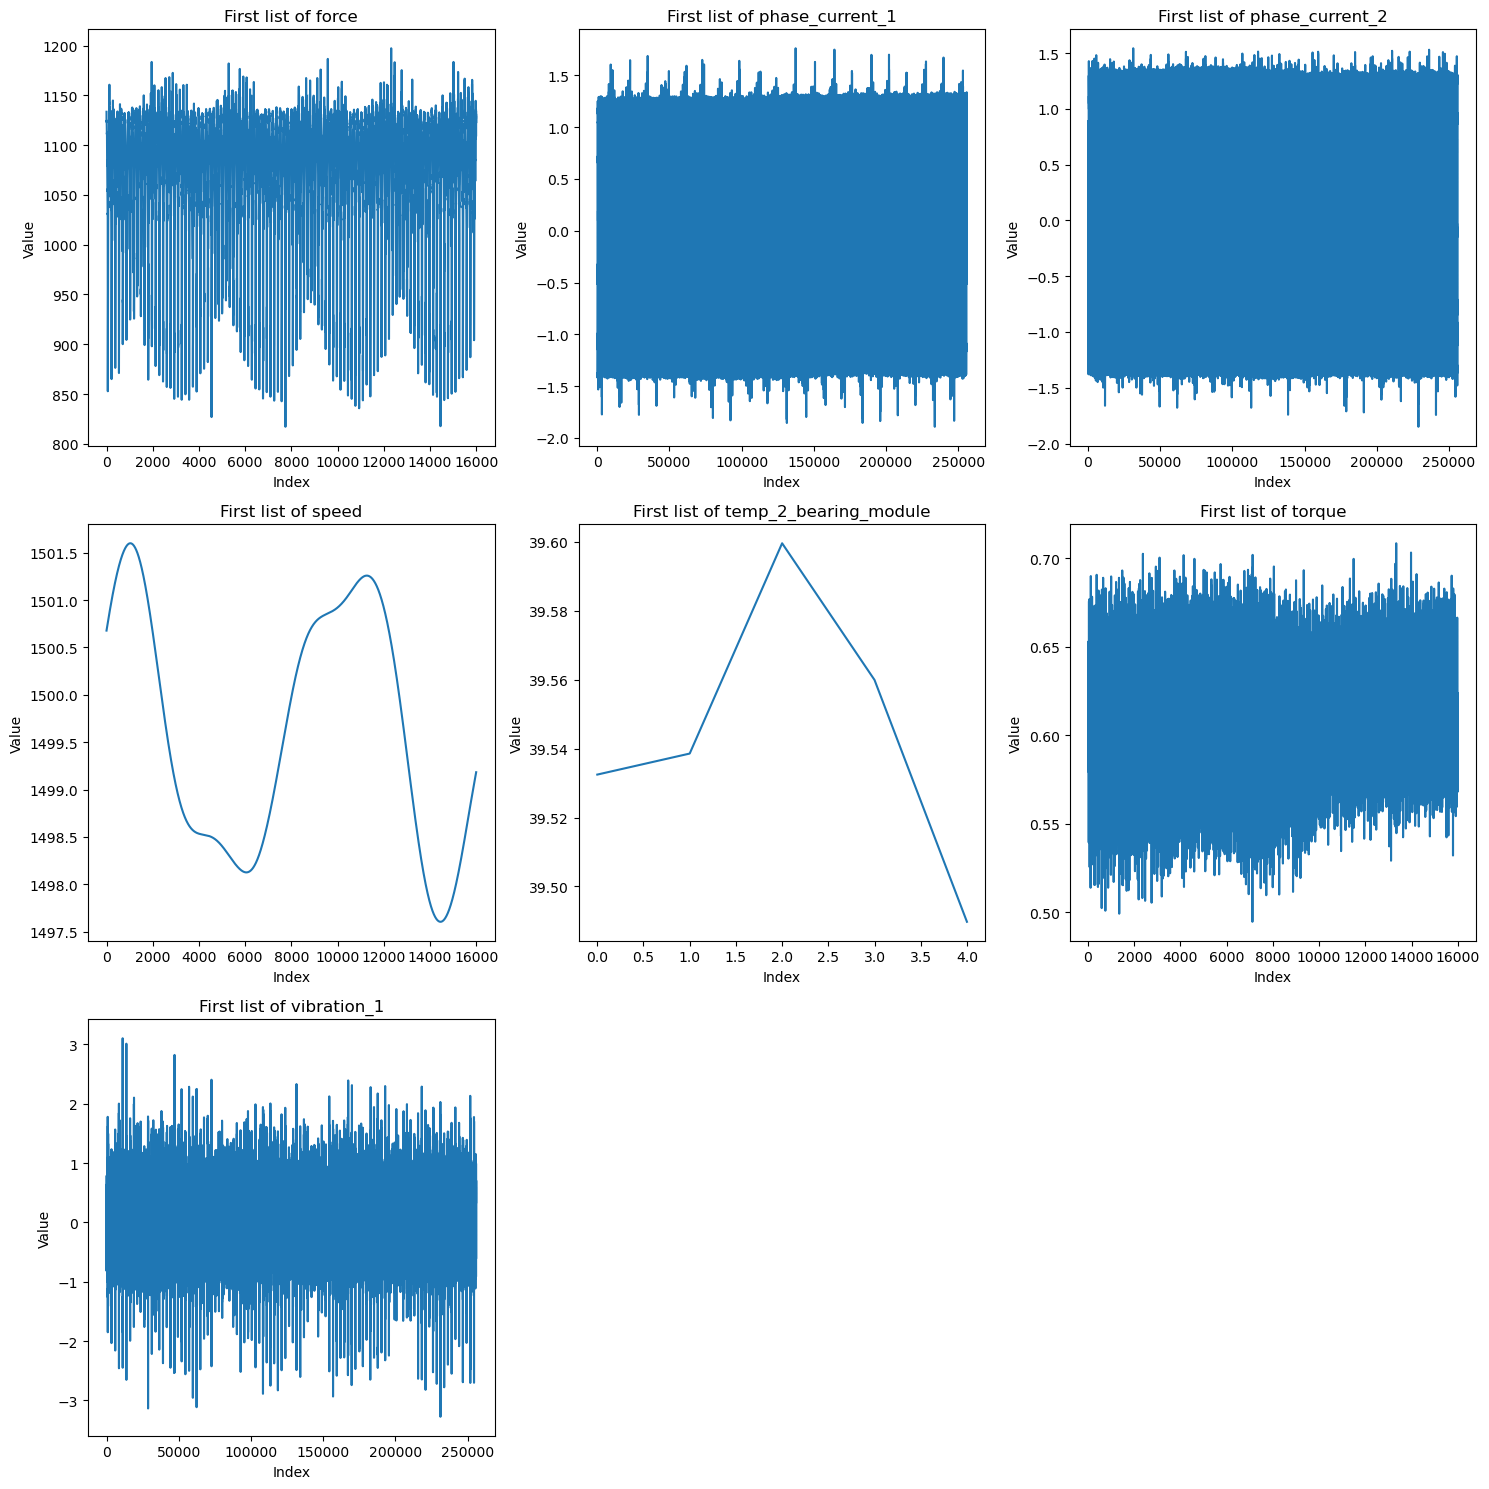

In [274]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains lists in each cell
features = ['force', 'phase_current_1', 'phase_current_2', 'speed', 'temp_2_bearing_module', 'torque', 'vibration_1']

# Create a subplot grid of 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axis array for easy indexing
axs = axs.flatten()

# Loop through each feature and plot the first list
for i, feature in enumerate(features):
    first_list = list(all_data_df[feature])[0]
    axs[i].plot(first_list)
    axs[i].set_title(f'First list of {feature}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')

# Remove any unused subplots
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


# Multimodal Multiview

In [288]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv,SAGEConv
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.neighbors import NearestNeighbors

model_dict = {}
train_df = new_df[new_df['subdir'].isin(train_subdirs)]
test_df = new_df[new_df['subdir'].isin(test_subdirs)]
for col in data_cats:
    # Filter DataFrame to create training and testing datasets
    

    # Loop through each row to train and test models
    X_train = np.array(train_df[col].tolist())[:,:9]
    y_train = train_df['label'].values
    X_test = np.array(test_df[col].tolist())[:,:9]
    y_test = test_df['label'].values
    
    embeddings = X_train
    # Compute the KNN graph using scikit-learn's NearestNeighbors class
    knn = NearestNeighbors(n_neighbors=8, metric='euclidean')
    knn.fit(embeddings) 
    distances, indices = knn.kneighbors(embeddings)

    # Convert the indices matrix to a COO sparse matrix format that can be used in PyTorch Geometric (PyG)
    import torch
    from scipy.sparse import coo_matrix

    indices = np.stack([np.repeat(np.arange(embeddings.shape[0]), 8), indices.flatten()])
    values = np.ones(embeddings.shape[0]*8)
    indices_torch = torch.from_numpy(indices)
    values_torch = torch.from_numpy(values)
    sparse_matrix = coo_matrix((values, indices), shape=(embeddings.shape[0], embeddings.shape[0]))
    edge_index = torch.LongTensor(np.vstack((sparse_matrix.row, sparse_matrix.col)))
    edge_attr = torch.FloatTensor(distances.flatten())

    data_time_train = Data(x=torch.FloatTensor(np.array(embeddings)),
                edge_index=edge_index)


    
    embeddings = X_test
    # Compute the KNN graph using scikit-learn's NearestNeighbors class
    knn = NearestNeighbors(n_neighbors=8, metric='euclidean')
    knn.fit(embeddings) 
    distances, indices = knn.kneighbors(embeddings)

    # Convert the indices matrix to a COO sparse matrix format that can be used in PyTorch Geometric (PyG)
    import torch
    from scipy.sparse import coo_matrix

    indices = np.stack([np.repeat(np.arange(embeddings.shape[0]), 8), indices.flatten()])
    values = np.ones(embeddings.shape[0]*8)
    indices_torch = torch.from_numpy(indices)
    values_torch = torch.from_numpy(values)
    sparse_matrix = coo_matrix((values, indices), shape=(embeddings.shape[0], embeddings.shape[0]))
    edge_index = torch.LongTensor(np.vstack((sparse_matrix.row, sparse_matrix.col)))
    edge_attr = torch.FloatTensor(distances.flatten())

    data_time_test = Data(x=torch.FloatTensor(np.array(embeddings)),
                edge_index=edge_index)
    model_dict[col] = [data_time_train, y_train, data_time_test, y_test]
    

In [ ]:
from tqdm.notebook import tqdm
class MultiheadMultiviewGNN(torch.nn.Module):
    def __init__(self, input_dims, hidden_dim, output_dim, num_views, num_heads):
        super().__init__()
        self.input_dims = input_dims
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_views = num_views
        self.num_heads = num_heads
        self.bn1 = nn.BatchNorm1d(num_features=16)
        
        # Define GCNConv layers for each view and each head
        self.gcn_convs = torch.nn.ModuleList([
            torch.nn.ModuleList([
                SAGEConv(input_dims[i], hidden_dim)
                for j in range(num_heads)
            ])
            for i in range(num_views)
        ])
        self.mlp_1 = torch.nn.ModuleList([
            torch.nn.ModuleList([
                nn.Linear(input_dims[i], hidden_dim)
                for j in range(num_heads)
            ])
            for i in range(num_views)
        ])

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim * num_views * num_heads, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )
        
    def node_loss(self, pred, labels):
        loss = F.cross_entropy(pred, labels)
        return loss
    def trended_line_loss_pytorch(self, y_true, y_pred, lambda_penalty):
        # Calculate the original mean squared error loss
        mse_loss = F.mse_loss(y_true, y_pred, reduction='none').sum(dim=0)

        # Calculate the differences between consecutive predicted values
        differences = torch.abs(y_pred[1:] - y_pred[:-1])

        # Sum the absolute differences and scale by the penalty hyperparameter
        penalty = lambda_penalty * differences.sum(dim=0)

        # Calculate the total loss
        total_loss = mse_loss + penalty

        return total_loss

    
    def rmse_loss(self, y_pred, y_true):
        mse = torch.mean((y_pred - y_true) ** 2)
        rmse = torch.sqrt(mse)
        return rmse
    
    def TFC_reg(self, Z1, Z2, lambda_reg):
        # Compute the distance between the embeddings
        dist = torch.norm(Z1 - Z2, p=2, dim=1)
    
        # Compute the distance-based regularization term
        L_reg = lambda_reg * torch.sum(dist**2)

        # Compute the overall loss, including the regularization term
        return L_reg
        
    def forward(self, x_views, edge_indices):
        # x_views is a list of input tensors, one for each view
        
        # Apply GCNConv layer to each view for each head
        hidden_views = []
        for i in range(self.num_views):
            hidden_heads = []
            for j in range(self.num_heads):
                hidden_head = self.mlp_1[i][j](x_views[i])
                hidden_head = F.relu(hidden_head)
                hidden_heads.append(hidden_head)
            hidden_heads = torch.cat(hidden_heads, dim=-1)
            hidden_views.append(hidden_heads)

        # Combine hidden views
        hidden = torch.cat(hidden_views, dim=-1)
        
        return self.mlp(hidden)

def normalize_tensor_along_first_dim(tensor):
    # Compute the mean and standard deviation along the first dimension (axis=0)
    mean = torch.mean(tensor, dim=0, keepdim=True)
    std = torch.std(tensor, dim=0, keepdim=True)
    
    # Normalize the tensor by subtracting the mean and dividing by the standard deviation
    normalized_tensor = (tensor - mean) / (std + 1e-8)  # Add small epsilon to avoid division by zero
    
    return normalized_tensor
# Initialize the multi-head multi-view GNN model
all_models = dict()
for col in data_cats:
    data_time, train_labels_np,_,_ = model_dict[col]
    model_multiview_MLP = MultiheadMultiviewGNN(input_dims=[data_time.x.shape[-1]], hidden_dim=32, output_dim=3, num_views=1, num_heads=4).cuda()

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_multiview_MLP.parameters(), lr=0.0005, weight_decay=0.001)
    data_time = data_time.cuda()

    x_mean_time = torch.mean(data_time.x, dim=0, keepdim=True)
    x_std_time = torch.std(data_time.x, dim=0, keepdim=True)
    x_norm_time = (data_time.x - x_mean_time) / (x_std_time + 1e-8)


    views = [x_norm_time]
    edges = [data_time.edge_index]
    y_true = torch.LongTensor(train_labels_np).cuda()
    pbar = tqdm(total=1000, desc="Loss: N/A")
    for epoch in range(1000):

        model_multiview_MLP.train()
        optimizer.zero_grad()
#         mask = mask.bool()
        pred_mlp = model_multiview_MLP(views, edges)
        loss = loss_fn(pred_mlp, y_true)
        loss.backward()
#         print(loss)
        optimizer.step()


        pbar.set_description(f"Loss: {loss:.4f}")
        pbar.update(1)
    pbar.close()
    all_models[col] = model_multiview_MLP


Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]

In [294]:
for col in data_cats:
    _, _, data_time_test, test_labels_np= model_dict[col]
    model_cur = all_models[col]

    data_time_test = data_time_test.cuda()

    x_mean_time = torch.mean(data_time_test.x, dim=0, keepdim=True)
    x_std_time = torch.std(data_time_test.x, dim=0, keepdim=True)
    x_norm_time = (data_time_test.x - x_mean_time) / (x_std_time + 1e-8)


    views = [x_norm_time]
    edges = [data_time_test.edge_index]
    y_true = torch.LongTensor(test_labels_np).cuda()
    pred = model_cur(views, edges)
    correct_preds = 0
    
    
    correct_preds += (torch.argmax(pred, dim=-1) == y_true).sum().item()
    acc = correct_preds/y_true.shape[0]
    print(f'the accuracy for {col} modality and for current model is {acc}%')

the accuracy for force modality and for current model is 0.3153846153846154%
the accuracy for phase_current_1 modality and for current model is 0.3423076923076923%
the accuracy for phase_current_2 modality and for current model is 0.26153846153846155%
the accuracy for speed modality and for current model is 0.40384615384615385%
the accuracy for temp_2_bearing_module modality and for current model is 0.26346153846153847%
the accuracy for torque modality and for current model is 0.3346153846153846%
the accuracy for vibration_1 modality and for current model is 0.5846153846153846%


In [297]:
for col in data_cats:
    _, _, data_time_test, test_labels_np= model_dict[col]
    model_cur = all_models[col]

    data_time_test = data_time_test.cuda()

    x_mean_time = torch.mean(data_time_test.x, dim=0, keepdim=True)
    x_std_time = torch.std(data_time_test.x, dim=0, keepdim=True)
    x_norm_time = (data_time_test.x - x_mean_time) / (x_std_time + 1e-8)


    views = [x_norm_time]
    edges = [data_time_test.edge_index]
    y_true = torch.LongTensor(test_labels_np).cuda()
    pred = model_cur(views, edges)
    correct_preds = 0
    
    
    correct_preds += (torch.argmax(pred, dim=-1) == y_true).sum().item()
    acc = correct_preds/y_true.shape[0]
    print(f'the accuracy for {col} modality and for current model is {acc}%')

the accuracy for force modality and for current model is 0.2903846153846154%
the accuracy for phase_current_1 modality and for current model is 0.3230769230769231%
the accuracy for phase_current_2 modality and for current model is 0.1875%
the accuracy for speed modality and for current model is 0.3625%
the accuracy for temp_2_bearing_module modality and for current model is 0.2644230769230769%
the accuracy for torque modality and for current model is 0.33653846153846156%
the accuracy for vibration_1 modality and for current model is 0.49903846153846154%


In [238]:
y_true = torch.LongTensor(test_labels_np).cuda()
y_true

NameError: name 'test_labels_np' is not defined

In [201]:
def convert_to_pyg_data(raw_data, labels, K):
    embeddings = raw_data
    # Obtain frequency domain features
    freq_features_tensor = embeddings

    # Function to create a PyG Data object for a given view
    def create_data_object(features, labels):
        # Compute the KNN graph
        knn = NearestNeighbors(n_neighbors=K, metric='euclidean')
        knn.fit(features)
        distances, indices = knn.kneighbors(features)

        # Convert the indices matrix to a COO sparse matrix format
        indices = (np.repeat(np.arange(features.shape[0]), K), indices.flatten())
        values = np.ones(features.shape[0]*K)
        values_torch = torch.from_numpy(values)
        sparse_matrix = coo_matrix((values, indices), shape=(features.shape[0], features.shape[0]))
        edge_index = torch.LongTensor(np.vstack((sparse_matrix.row, sparse_matrix.col)))
        edge_attr = torch.FloatTensor(distances.flatten())
        labels = torch.linspace(1, 0, steps=features.shape[0])
        # Create PyG Data object
        return Data(x=torch.FloatTensor(features), y=torch.Tensor(labels),
                    edge_index=edge_index, edge_attr=edge_attr)

        # Create Data objects for each view and store in the dictionary
    data_freq = create_data_object(freq_features_tensor, labels)
    return data_freq
train_data_g = list()
test_data_g = list()
for col in data_cats:
    # Filter DataFrame to create training and testing datasets

    
    cur_mod = np.array(list(train_df[col]))
    train_data_g.append(convert_to_pyg_data(cur_mod, y_train, 16))
    cur_mod = np.array(list(test_df[col]))
    test_data_g.append(convert_to_pyg_data(cur_mod, y_test, 16))

In [202]:
train_data_g

[Data(x=[1200, 128], edge_index=[2, 19200], edge_attr=[19200], y=[1200]),
 Data(x=[1200, 128], edge_index=[2, 19200], edge_attr=[19200], y=[1200]),
 Data(x=[1200, 128], edge_index=[2, 19200], edge_attr=[19200], y=[1200]),
 Data(x=[1200, 128], edge_index=[2, 19200], edge_attr=[19200], y=[1200]),
 Data(x=[1200, 3], edge_index=[2, 19200], edge_attr=[19200], y=[1200]),
 Data(x=[1200, 128], edge_index=[2, 19200], edge_attr=[19200], y=[1200]),
 Data(x=[1200, 128], edge_index=[2, 19200], edge_attr=[19200], y=[1200])]

In [ ]:
train_data_g = list()
for col in data_cats:
    cur_mod = np.array(list(new_df[col]))
    train_data_g.append(convert_to_pyg_data(cur_mod, y_train, 16))

In [258]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import random

class ContrastiveDataset(Dataset):
    def __init__(self, data_len, positive_margin_range, negative_margin_range):
        self.data_len = data_len
        self.positive_margin_range = positive_margin_range
        self.negative_margin_range = negative_margin_range

    def __len__(self):
        return self.data_len  # Assumes all views have the same length

    def __getitem__(self, index):
        # For anchor, just return the index as is
        anchor_index = index
        
        # Get a positive example index
        positive_margin = random.randint(*self.positive_margin_range)
        positive_index = index + positive_margin
        if positive_index >= self.data_len:
            positive_index = index - positive_margin

        # Get a negative example index
        negative_margin = random.randint(*self.negative_margin_range)
        negative_index = index + negative_margin
        if negative_index >= self.data_len:
            negative_index = index - negative_margin

        return anchor_index, positive_index, negative_index

class ContrastiveLoss(nn.Module):
    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                       (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive
# Set the margins based on your specifications


all_datasets_cl = []

# Create the dataset and dataloader
data_len = train_data_g[0].x.shape[0]
positive_margin_range = (0, 3)
negative_margin_range = (data_len // 4, data_len // 2)
contrastive_dataset = ContrastiveDataset(data_len, positive_margin_range, negative_margin_range)
train_loader = DataLoader(contrastive_dataset, batch_size=128, shuffle=True)
all_datasets_cl.append(train_loader)


In [204]:
import torch.nn as nn
import torch
import torch.nn as nn
from torch_geometric.nn import SAGEConv
import torch.nn.functional as F

class ContrastiveLoss(nn.Module):
        def __init__(self, margin):
            super(ContrastiveLoss, self).__init__()
            self.margin = margin

        def forward(self, output1, output2, label):
            euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)
            loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                           (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
            return loss_contrastive

class MultiheadMultiviewGNN(torch.nn.Module):
    def __init__(self, input_dims, hidden_dim, output_dim, num_modality, num_heads):
        super().__init__()
        self.input_dims = input_dims
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_modality = num_modality
        self.num_heads = num_heads
        self.view_weights = nn.Parameter(torch.ones(self.num_modality, dtype=torch.float)/self.num_modality)
#         self.view_weights = nn.Parameter(torch.ones((num_modality, hidden_dim*(num_heads+1))) / num_modality) 
        self.load = torch.nn.ModuleList([
            torch.nn.ModuleList([
                nn.Linear(input_dims[i], hidden_dim)
                for j in range(num_heads)
            ])
            for i in range(num_modality)
        ])
        
        # Define GCNConv layers for each view and each head
        self.gcn_convs = torch.nn.ModuleList([
            torch.nn.ModuleList([
                SAGEConv(input_dims[i], hidden_dim)
                for j in range(num_heads)
            ])
            for i in range(num_modality)
        ])
        
        
    def node_loss(self, pred, labels):
        loss = F.cross_entropy(pred, labels)
        return loss
    
    def trended_line_loss_pytorch(self, y_true, y_pred, lambda_penalty):
        # Calculate the original mean squared error loss
        mse_loss = F.mse_loss(y_true, y_pred, reduction='none').sum(dim=0)

        # Calculate the differences between consecutive predicted values
        differences = torch.abs(y_pred[1:] - y_pred[:-1])

        # Sum the absolute differences and scale by the penalty hyperparameter
        penalty = lambda_penalty * differences.sum(dim=0)

        # Calculate the total loss
        total_loss = mse_loss + penalty

        return total_loss
    

    def sample_curriculum(self, loss, lambda_1=1, lambda_2=1):
        if lambda_2 == 0:
            return loss <= lambda_1
        else:
            find_max = torch.max(torch.stack([torch.zeros_like(loss), 1 - (loss - lambda_1)/lambda_2]), dim=0).values
            find_min = torch.min(torch.stack([torch.ones_like(loss), find_max]), dim=0).values
            return find_min

    def curriculum_regularizer(self, weight, lambda_1=1, lambda_2=1):
        return 1/2*lambda_2 *weight**2 - (lambda_1 + lambda_2)*weight

    def rmse_loss(self, y_pred, y_true):
        mse = torch.mean((y_pred - y_true) ** 2)
        rmse = torch.sqrt(mse)
        return rmse
    
    def difference_loss(self, representations):
        loss = 0.0
        for i in range(self.num_modality):
            for j in range(i + 1, self.num_modality):
                loss +=  torch.norm(representations[i] - representations[j], p=2)
        return loss
    
    def forward(self, x_views, edge_indices, use_cl=True, pretrain=True):
        # x_views is a list of input tensors, one for each view
        # Apply GCNConv layer to each view for each head
        hidden_views = []
        weighted_hiden_views = []
        for i in range(self.num_modality):
            hidden_heads = []
            for j in range(self.num_heads):
                hidden_head = self.gcn_convs[i][j](x_views[i], edge_indices[i])
                hidden_head = F.relu(hidden_head)
                hidden_heads.append(hidden_head)
            weights = self.view_weights[i]
            
#             weights = weights.unsqueeze(0)
            hidden_heads = torch.cat(hidden_heads, dim=-1)
            hidden_views.append(hidden_heads)
            weighted_hiden_views.append(hidden_heads*weights)
            
    
        stacked_hidden_views = torch.stack(weighted_hiden_views)

        # Now sum along the new dimension (dimension 0) to get the element-wise sum
        summed_hidden_views = torch.sum(stacked_hidden_views, dim=0)
        if pretrain:
            pretrain_loss = self.difference_loss(hidden_views)
            
            return summed_hidden_views, pretrain_loss
        
        return summed_hidden_views
    

    
    

In [2]:
from tqdm.notebook import tqdm
model_multiview_transfer = MultiheadMultiviewGNN(input_dims=[128,128,128,128,128,128], hidden_dim=128, output_dim=3, num_modality=6, num_heads=4).cuda()
optimizer = torch.optim.Adam(model_multiview_transfer.parameters(), lr=0.001, weight_decay=0.001)
# Bearing-specific DataLoader
(f1,f2,f3,f4,f5,f6,f7) = train_data_g
for data_cl in all_datasets_cl:
    
    # Now, train_loader is a DataLoader for the specific bearing
    
    loss_fn = ContrastiveLoss(margin=2.0)
#     loss_fn_2 = 
    
    views = [f1.x.cuda(), f2.x.cuda(),f3.x.cuda(), f4.x.cuda(), f6.x.cuda(), f7.x.cuda()]
    edges = [f1.edge_index.cuda(), f2.edge_index.cuda(),f3.edge_index.cuda(), f4.edge_index.cuda(),  f6.edge_index.cuda(), f7.edge_index.cuda()]
    pbar = tqdm(total=100, desc="Loss: N/A")
    for epoch in range(100):
        for anchor_index, positive_index, negative_index in data_cl:

    #     y_true = data_time.y.cuda()


            model_multiview_transfer.train()
            optimizer.zero_grad()
    #         mask = mask.bool()
            embeddings, diff_loss = model_multiview_transfer(views, edges, pretrain=True)
        
            positive_loss = loss_fn(embeddings[anchor_index], embeddings[positive_index], torch.tensor(1.0).cuda())
            negative_loss = loss_fn(embeddings[anchor_index], embeddings[negative_index], torch.tensor(0.0).cuda())
            
            loss = positive_loss + negative_loss

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            
        pbar.set_description(f"Loss: {loss:.4f}")
        pbar.update(1)
    pbar.close()


In [3]:
#    def rmse_loss(self, y_pred, y_true):
#         mse = torch.mean((y_pred - y_true) ** 2)
#         rmse = torch.sqrt(mse)
#         return rmse

import numpy as np


def generate_masks(batch_size, num_nodes, mask_size):
    masks = []
    for _ in range(batch_size):
        mask = np.zeros(num_nodes, dtype=bool)  # change the dtype to bool
        selected_nodes = np.random.choice(num_nodes, mask_size, replace=False)
        mask[selected_nodes] = True  # change the value to True
        masks.append(mask)
    return np.array(masks)

loss_fn = nn.MSELoss()
class MultiheadMultiviewClassifier(nn.Module):
    def __init__(self, gnn_model, output_dim):
        super(MultiheadMultiviewClassifier, self).__init__()
#         self.gnn_model = gnn_model
#         self.gnn_model = MultiheadMultiviewGNN(input_dims=[128,128,128,128,128,128], hidden_dim=128, output_dim=3, num_modality=6, num_heads=4)
        self.gnn_model = MultiheadMultiviewGNN(input_dims=[128], hidden_dim=128, output_dim=3, num_modality=1, num_heads=4)
        out_dim = gnn_model.hidden_dim * gnn_model.num_heads
        self.classifier = nn.Sequential(
            nn.Linear(out_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            # Removed Sigmoid activation for regression task
            nn.Softmax(dim=-1)
        )
        
    
    
#     def curriculum(self, individual_losses, lambda_1=1, lambda_2=1):
#         # Compute curriculum weights for each individual loss
#         weights = torch.clamp(1 - (individual_losses - lambda_1) / lambda_2, min=0, max=1)
#         return weights
    def curriculum(self, loss, lambda_1=1, lambda_2=1):
        if lambda_2 == 0:
            return loss <= lambda_1
        else:
            find_max = torch.max(torch.stack([torch.zeros_like(loss), 1 - (loss - lambda_1)/lambda_2]), dim=0).values
            find_min = torch.min(torch.stack([torch.ones_like(loss), find_max]), dim=0).values
            return find_min
    def curriculum_regularizer(self, weights, lambda_1=1, lambda_2=1):
#         # Apply regularization to each weight
        regularized_weights = 1/2 * lambda_2 * weights ** 2 - (lambda_1 + lambda_2) * weights
        return regularized_weights

    def forward(self, x_views, edge_indices, target, lambda_1=1, lambda_2=1):
        # Obtain the embeddings from the MultiheadMultiviewGNN model
        embeddings = self.gnn_model(x_views, edge_indices, pretrain=False)
        # Use the embeddings to obtain RUL predictions
        output = self.classifier(embeddings).squeeze()  # Ensure output is a 1D tensor
        
        # Calculate the loss for each sample
        ce_loss_fn = nn.CrossEntropyLoss(reduction='none')  # Use 'none' to keep the individual losses
        individual_losses = ce_loss_fn(output, target.long())
        
        # Apply the curriculum to each sample
        sample_weights = self.curriculum(individual_losses, lambda_1, lambda_2)
        regularized_weights = self.curriculum_regularizer(sample_weights, lambda_1, lambda_2)
        
        # Calculate the final weighted loss
        weighted_loss = torch.mean(sample_weights * individual_losses) + torch.mean(regularized_weights)
        # Calculate the final weighted loss
#         weighted_loss = torch.mean(sample_weights * individual_losses)
        return output, weighted_loss
import copy


# (f1,f2,f3,f4,f5,f6,f7) = train_data_g
# data_time = hf.cuda()
# data_freq = vf.cuda()

# # Normalize the input features
# x_mean_time = torch.mean(data_time.x, dim=0, keepdim=True)
# x_std_time = torch.std(data_time.x, dim=0, keepdim=True)
# x_norm_time = (data_time.x - x_mean_time) / (x_std_time + 1e-8)

# x_mean_freq = torch.mean(data_freq.x, dim=0, keepdim=True)
# x_std_freq = torch.std(data_freq.x, dim=0, keepdim=True)
# x_norm_freq = (data_freq.x - x_mean_freq) / (x_std_freq + 1e-8)

(f1,f2,f3,f4,f5,f6,f7) = train_data_g
for i,j in zip(train_data_g, test_data_g):
    if i.x.shape[1] < 128:
        continue
# views = [f1.x.cuda(), f2.x.cuda(),f3.x.cuda(), f4.x.cuda(),  f6.x.cuda(), f7.x.cuda()]
# edges = [f1.edge_index.cuda(), f2.edge_index.cuda(),f3.edge_index.cuda(), f4.edge_index.cuda(),  f6.edge_index.cuda(), f7.edge_index.cuda()]
    model_multiview_class = MultiheadMultiviewClassifier(copy.deepcopy(model_multiview_transfer), 3).cuda()
    optimizer = torch.optim.Adam(model_multiview_class.parameters(), lr=0.001, weight_decay=0.0001)  # Adjusted learning rate and weight decay

    views = [i.x.cuda()]
    edges = [i.edge_index.cuda()]
    y_true = torch.LongTensor(y_train).cuda()

    pbar = tqdm(total=300, desc="Loss: N/A")
    coef = 1  # Start with a lower curriculum coefficient
    coef2 = 1  # Start with a lower curriculum coefficient

    for epoch in range(300):
        model_multiview_class.train()
        optimizer.zero_grad()

        pred_mlp, wloss = model_multiview_class(views, edges, y_true, coef2, coef)

        wloss.backward()
    #         torch.nn.utils.clip_grad_norm_(model_multiview_class.parameters(), 1.0)
        optimizer.step()
        if epoch % 10 == 0:

            coef -= 0.01
            coef2 += 0.01
        # Update the progress bar with the current loss
        pbar.set_description(f"Loss: {wloss.item():.4f}")
        pbar.update(1)

    pbar.close()
    
    views = [j.x.cuda()]
    edges = [j.edge_index.cuda()]

    y_true =  torch.LongTensor(y_test).cuda()


    model_multiview_class.eval()

    pred_mlp, wloss = model_multiview_class(views, edges, y_true, coef2, coef)
    correct_preds = 0


    correct_preds += (torch.argmax(pred_mlp, dim=-1) == y_true.long()).sum().item()
    acc = correct_preds/y_true.shape[0]
    print(f'the accuracy for {col} modality and for current model is {acc}%')

In [4]:
(f1,f2,f3,f4,f5,f6,f7) = test_data_g
views = [f1.x.cuda(), f2.x.cuda(),f3.x.cuda(), f4.x.cuda(),  f6.x.cuda(), f7.x.cuda()]
edges = [f1.edge_index.cuda(), f2.edge_index.cuda(),f3.edge_index.cuda(), f4.edge_index.cuda(),  f6.edge_index.cuda(), f7.edge_index.cuda()]
    
y_true =  torch.LongTensor(y_test).cuda()


model_multiview_class.eval()

pred_mlp, wloss = model_multiview_class(views, edges, y_true, coef2, coef)
correct_preds = 0
    
    
correct_preds += (torch.argmax(pred_mlp, dim=-1) == y_true.long()).sum().item()
acc = correct_preds/y_true.shape[0]
print(f'the accuracy for {col} modality and for current model is {acc}%')


In [303]:
from tqdm.notebook import tqdm
class MultiheadMultiviewGNN(torch.nn.Module):
    def __init__(self, input_dims, hidden_dim, output_dim, num_views, num_heads):
        super().__init__()
        self.input_dims = input_dims
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_views = num_views
        self.num_heads = num_heads
        self.bn1 = nn.BatchNorm1d(num_features=16)
        
        # Define GCNConv layers for each view and each head
        self.gcn_convs = torch.nn.ModuleList([
            torch.nn.ModuleList([
                SAGEConv(input_dims[i], hidden_dim)
                for j in range(num_heads)
            ])
            for i in range(num_views)
        ])
        self.mlp_1 = torch.nn.ModuleList([
            torch.nn.ModuleList([
                nn.Linear(input_dims[i], hidden_dim)
                for j in range(num_heads)
            ])
            for i in range(num_views)
        ])

        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim * num_views * num_heads, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )
        
    def node_loss(self, pred, labels):
        loss = F.cross_entropy(pred, labels)
        return loss
    def trended_line_loss_pytorch(self, y_true, y_pred, lambda_penalty):
        # Calculate the original mean squared error loss
        mse_loss = F.mse_loss(y_true, y_pred, reduction='none').sum(dim=0)

        # Calculate the differences between consecutive predicted values
        differences = torch.abs(y_pred[1:] - y_pred[:-1])

        # Sum the absolute differences and scale by the penalty hyperparameter
        penalty = lambda_penalty * differences.sum(dim=0)

        # Calculate the total loss
        total_loss = mse_loss + penalty

        return total_loss

    
    def rmse_loss(self, y_pred, y_true):
        mse = torch.mean((y_pred - y_true) ** 2)
        rmse = torch.sqrt(mse)
        return rmse
    
    def TFC_reg(self, Z1, Z2, lambda_reg):
        # Compute the distance between the embeddings
        dist = torch.norm(Z1 - Z2, p=2, dim=1)
    
        # Compute the distance-based regularization term
        L_reg = lambda_reg * torch.sum(dist**2)

        # Compute the overall loss, including the regularization term
        return L_reg
        
    def forward(self, x_views, edge_indices):
        # x_views is a list of input tensors, one for each view
        
        # Apply GCNConv layer to each view for each head
        hidden_views = []
        for i in range(self.num_views):
            hidden_heads = []
            for j in range(self.num_heads):
                hidden_head = self.mlp_1[i][j](x_views[i])
                hidden_head = F.relu(hidden_head)
                hidden_heads.append(hidden_head)
            hidden_heads = torch.cat(hidden_heads, dim=-1)
            hidden_views.append(hidden_heads)

        # Combine hidden views
        hidden = torch.cat(hidden_views, dim=-1)
        
        return self.mlp(hidden)

def normalize_tensor_along_first_dim(tensor):
    # Compute the mean and standard deviation along the first dimension (axis=0)
    mean = torch.mean(tensor, dim=0, keepdim=True)
    std = torch.std(tensor, dim=0, keepdim=True)
    
    # Normalize the tensor by subtracting the mean and dividing by the standard deviation
    normalized_tensor = (tensor - mean) / (std + 1e-8)  # Add small epsilon to avoid division by zero
    
    return normalized_tensor
# Initialize the multi-head multi-view GNN model
all_models = dict()
all_data_time = []
all_data_test = []
for col in data_cats:
    data_time, train_labels_np,data_time_test,test_labels_np = model_dict[col]
    all_data_time.append(data_time)
    all_data_test.append(data_time_test)
model_multiview_MLP = MultiheadMultiviewGNN(input_dims=[i.x.shape[-1] for i in all_data_time], hidden_dim=32, output_dim=3, num_views=len(all_data_time), num_heads=4).cuda()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_multiview_MLP.parameters(), lr=0.0005, weight_decay=0.001)
data_time = data_time.cuda()
views = list()
edges = list()
for data_time in all_data_time:
    x_mean_time = torch.mean(data_time.x, dim=0, keepdim=True)
    x_std_time = torch.std(data_time.x, dim=0, keepdim=True)
    x_norm_time = (data_time.x - x_mean_time) / (x_std_time + 1e-8)
    views.append(x_norm_time)
    edges.append(data_time.edge_index)


y_true = torch.LongTensor(train_labels_np).cuda()
pbar = tqdm(total=1000, desc="Loss: N/A")
for epoch in range(1000):

    model_multiview_MLP.train()
    optimizer.zero_grad()
#         mask = mask.bool()
    pred_mlp = model_multiview_MLP(views, edges)
    loss = loss_fn(pred_mlp, y_true)
    loss.backward()
#         print(loss)
    optimizer.step()


    pbar.set_description(f"Loss: {loss:.4f}")
    pbar.update(1)
pbar.close()
all_models[col] = model_multiview_MLP


Loss: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]